In [2]:
from landscape_class import Landscape
from module_class import Node, UnstableNode, Center, NegCenter   #, UnstableSpiral
import numpy as np
import random
import morphogen_regimes as mr
import matplotlib.pyplot as plt

# %autoreload
from landscape_visuals import visualize_landscape, visualize_potential, visualize_landscape_t
# import landscape_visuals

%load_ext autoreload

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

Node at (-0.9072149706567596, 3.5551821727439004), a = [2.6642 0.4883 2.3951], s = [0.8915 0.3337 0.6645],
Node at (-1.3561324296789414, 2.18275236222141), a = [0.8816 0.149  0.1765], s = [0.5967 0.8127 1.2957],
Node at (-0.6056693742662895, 0.5272974564936059), a = [1.0865 2.3784 0.2044], s = [0.1274 1.0456 0.5697],
Node at (1.043545960534459, -1.221731216044442), a = [0.7401 0.5697 1.4552], s = [0.2758 0.8171 0.921 ],
Node at (2.0098140458890352, 1.5920871649239468), a = [3.0412 2.5466 3.3915], s = [0.13   1.2425 0.5253]

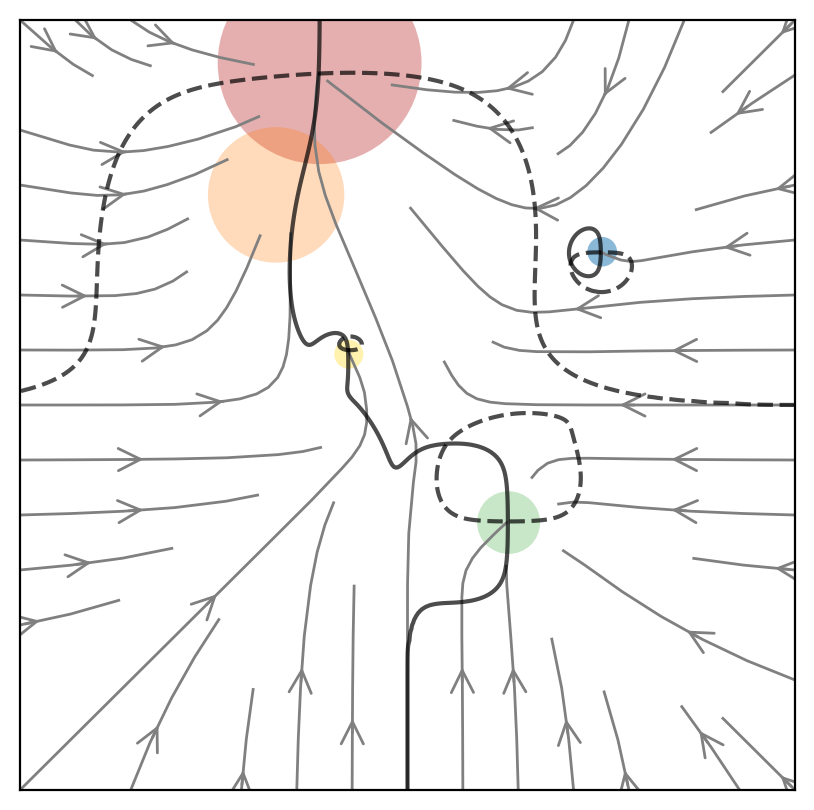

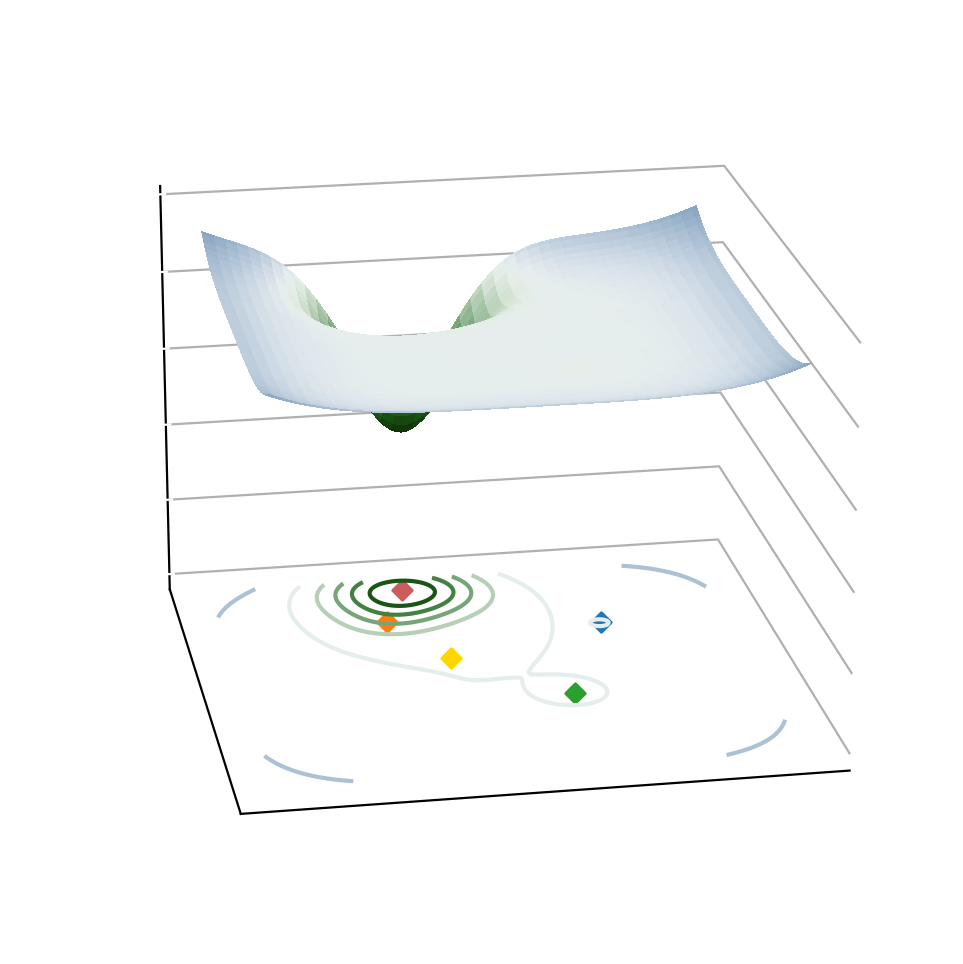

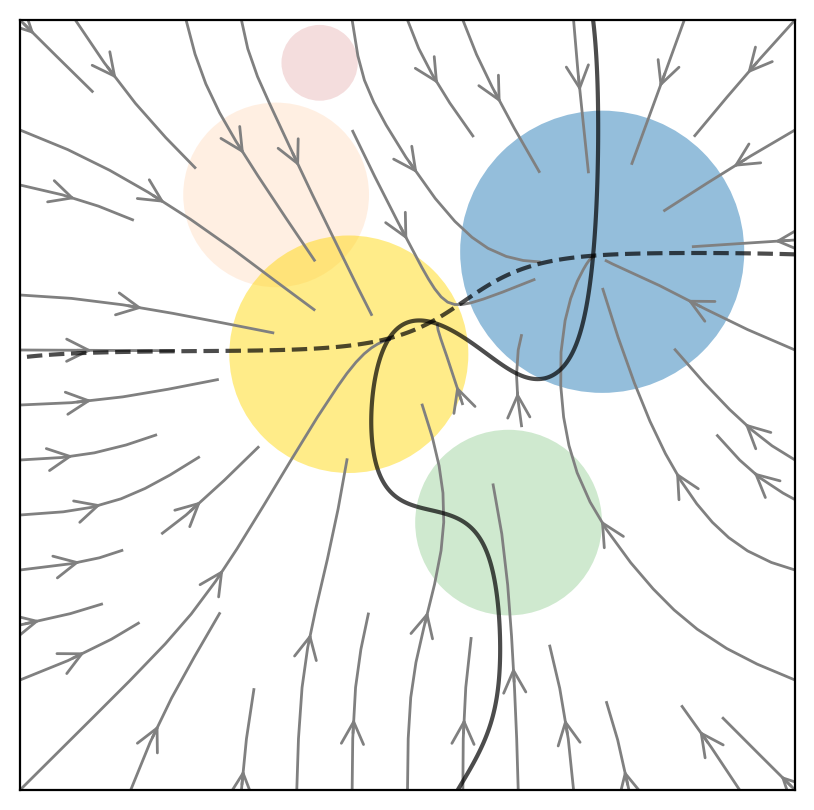

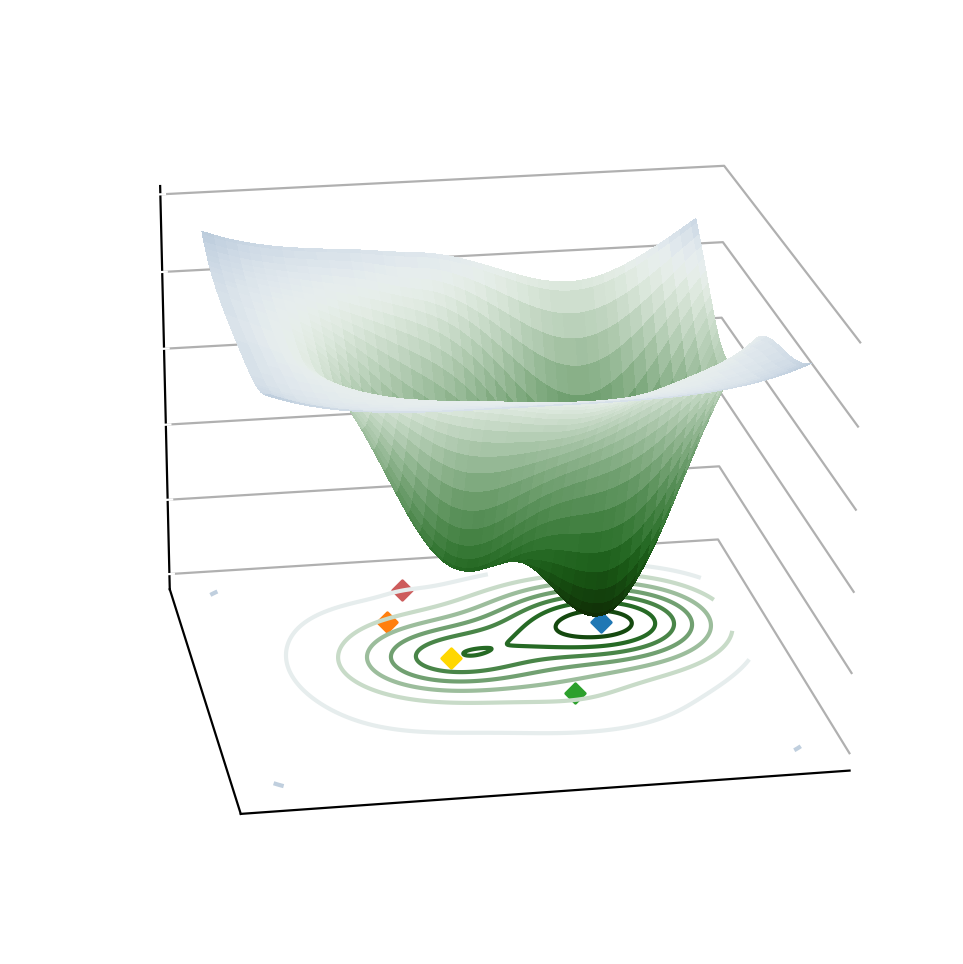

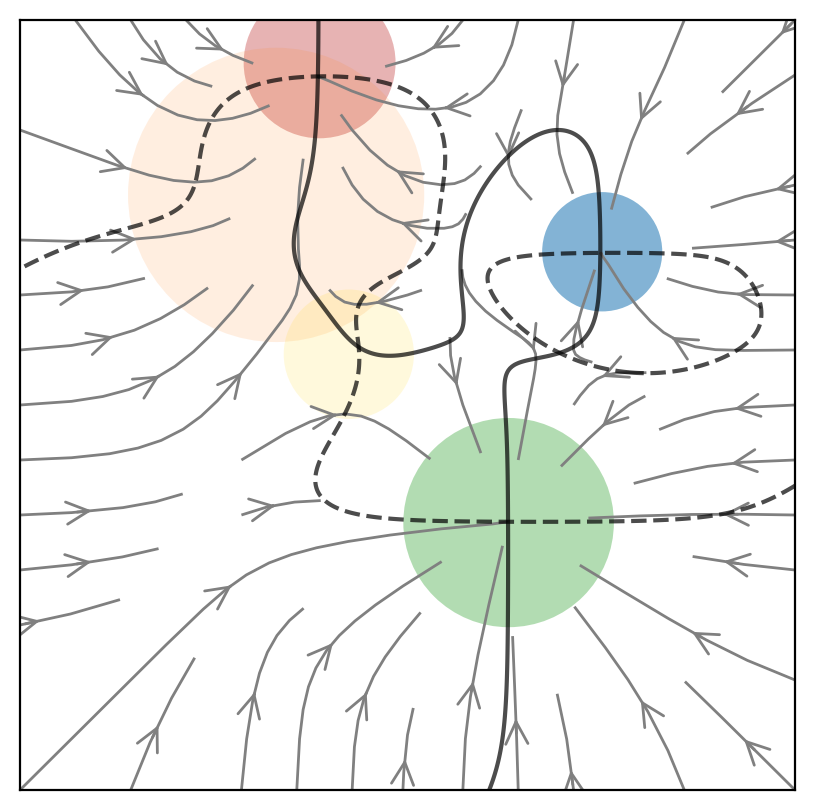

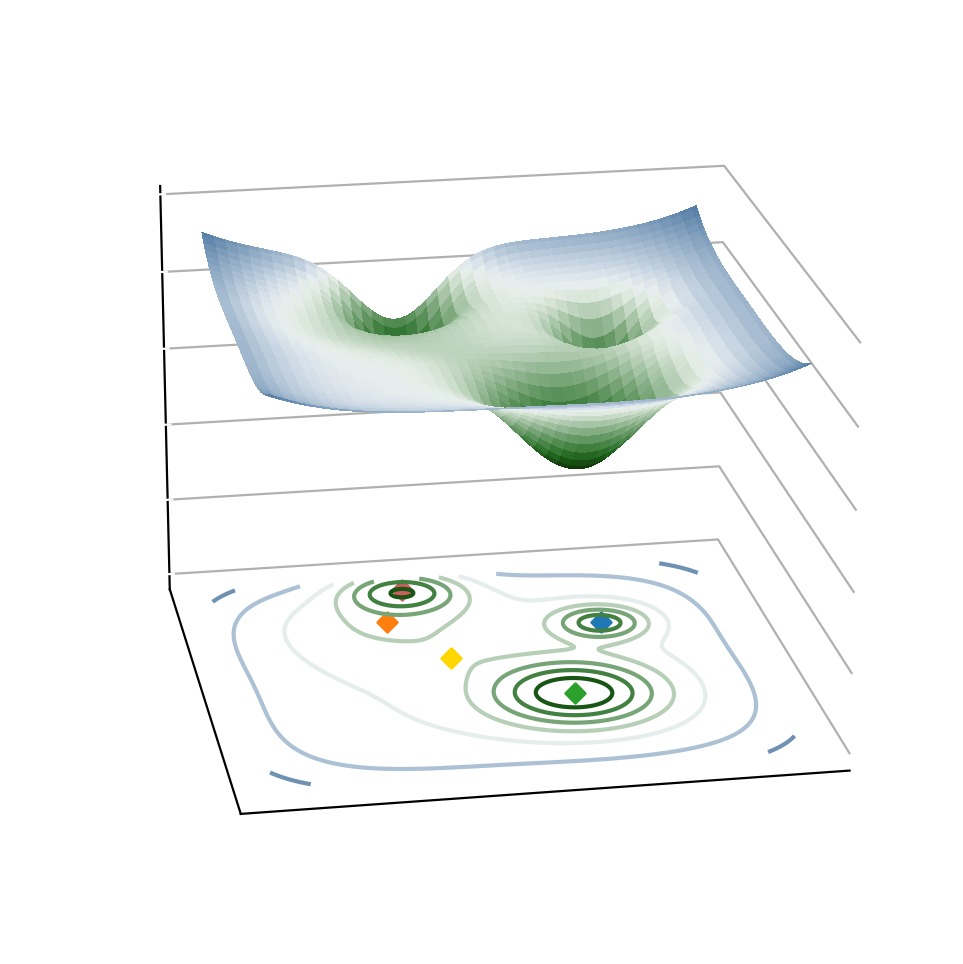

In [47]:
%autoreload

M1 = Node(x=-0.9072149706567596, y=3.5551821727439004, a=[2.6642, 0.4883, 2.3951], s=[0.8915, 0.3337, 0.6645])
M2 = Node(*(-1.3561324296789414, 2.18275236222141), a=[0.8816, 0.149, 0.1765], s=[0.5967, 0.8127, 1.2957])
M3 = Node(*(-0.6056693742662895, 0.5272974564936059), a=[1.0865, 2.3784, 0.2044], s = [0.1274, 1.0456, 0.5697])
M4 = Node(*(1.043545960534459, -1.221731216044442), a = [0.7401, 0.5697, 1.4552], s = [0.2758, 0.8171, 0.921 ])
M5 = Node(*(2.0098140458890352, 1.5920871649239468), a = [3.0412, 2.5466, 3.3915], s = [0.13,  1.2425, 0.5253])

module_list = [M1, M2, M3, M4, M5]

landscape = Landscape(module_list, mode=None, regime=mr.piecewise, morphogen_times=(1., 2.), A0=0.005)

zlim=(-4.1,1)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 1, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 2, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 2, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)



Landscape with modules:
Node at (-0.9876052168863785, 2.880188499380072), a = [2.5778 2.8767 1.4162], s = [0.5047 1.0625 0.8821],
Node at (1.660504276985617, -2.2680759770020886), a = [2.764  1.0726 2.0292], s = [0.9613 0.7886 0.6822],
UnstableNode at (2.550505095851573, -0.18297982344373276), a = [2.5611 1.9344 1.0612], s = [0.7865 0.5246 0.7194],
Center at (0.5827096887271148, 1.2266174464143846), a = [0.6826 2.8363 1.0734], s = [1.1574 0.9176 1.028 ],
Center at (-0.49136700281592116, -2.3691657174892433), a = [1.7366 2.6922 2.0912], s = [1.1253 0.5139 1.103 ],
NegCenter at (-0.5623931500470096, -0.6670512413340144), a = [2.986  2.4755 0.7642], s = [0.9682 0.9882 0.6777],
NegCenter at (-1.7083455332807542, -1.843364279965701), a = [1.9785 2.9973 1.8779], s = [1.1724 0.5775 1.1357]


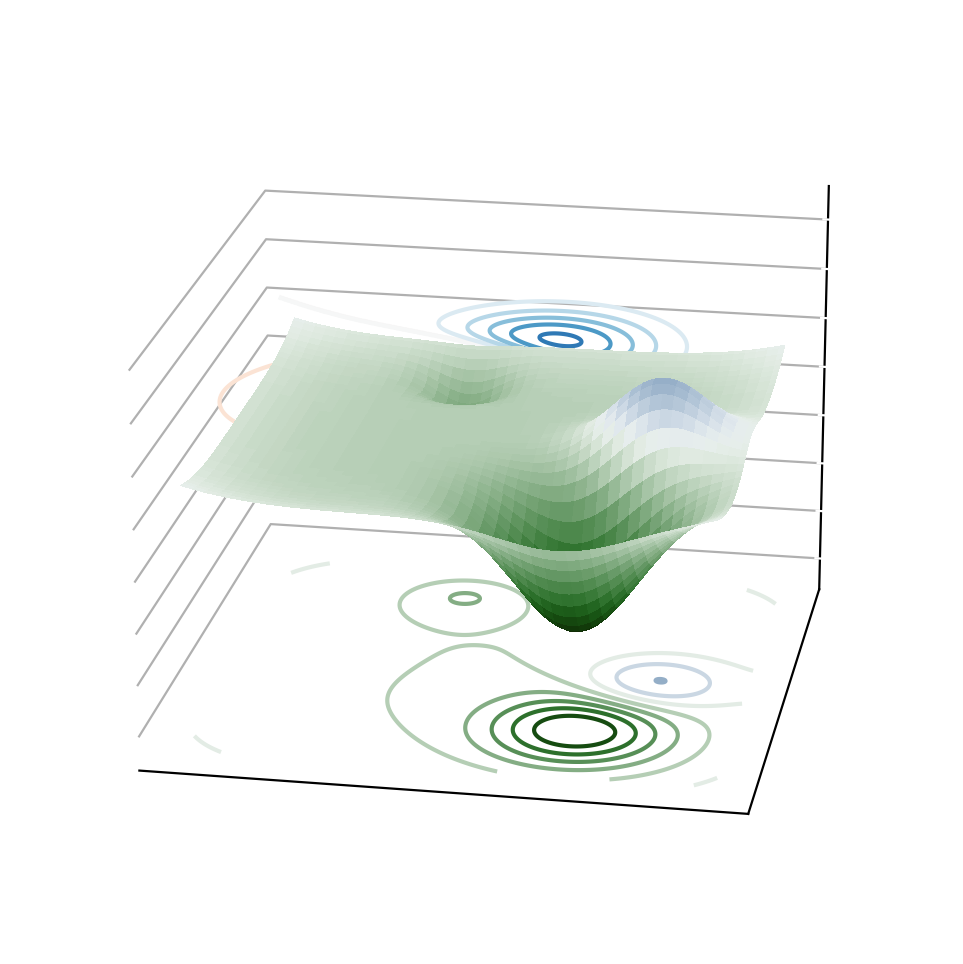

In [92]:
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}
%autoreload


used_fp_types = (Node,UnstableNode, Center, NegCenter)
# used_fp_types = (Node,)

n_modules = 7
start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]
start_module_list_3 = [Center.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]
start_module_list_4 = [NegCenter.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]

start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)

# fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-80, color_scheme='fp_types', cmap_center=None, wind=True)

# print(landscape)

Landscape with modules:
UnstableNode at (0.0538783108294858, -0.07144024659203518), a = [1.3117 1.1562 1.1026], s = [0.3536 0.2985 0.9613],
UnstableNode at (2.510332947649685, 2.8024319901402563), a = [1.7813 1.4281 1.1248], s = [0.8188 0.9419 0.6268],
UnstableNode at (1.9614376006981562, 0.5532404059629243), a = [1.5495 1.5061 1.1839], s = [0.4017 0.5024 0.225 ],
Node at (-1.8808261671788458, -1.941664545966463), a = [1.1932 1.064  0.6169], s = [0.1761 0.4459 0.1383],
UnstableNode at (1.477727280268085, 1.8413231730762654), a = [1.3068 1.9558 1.8483], s = [0.842  0.9962 0.1379],
UnstableNode at (1.6305156875292397, -1.1846038186218508), a = [1.8856 1.1311 1.2357], s = [0.7807 0.9774 0.1944],
Node at (-1.9964722077571462, -1.3896868275614942), a = [0.6703 1.5289 1.459 ], s = [0.8825 0.4736 0.2923],
UnstableNode at (-2.818449675343998, 2.834096555367694), a = [1.998  1.7857 1.0152], s = [0.5987 0.9529 0.1432],
UnstableNode at (2.6195084629769942, -0.13297462265265514), a = [0.6016 1.177

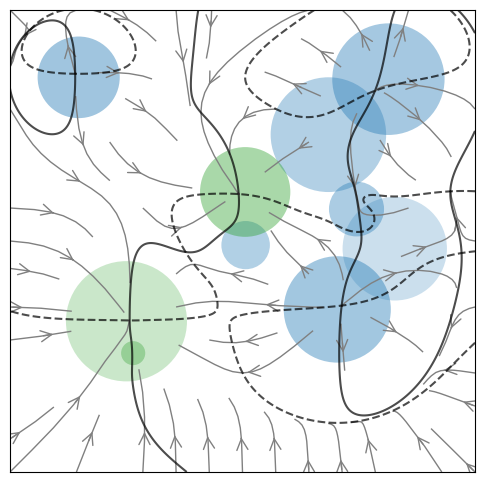

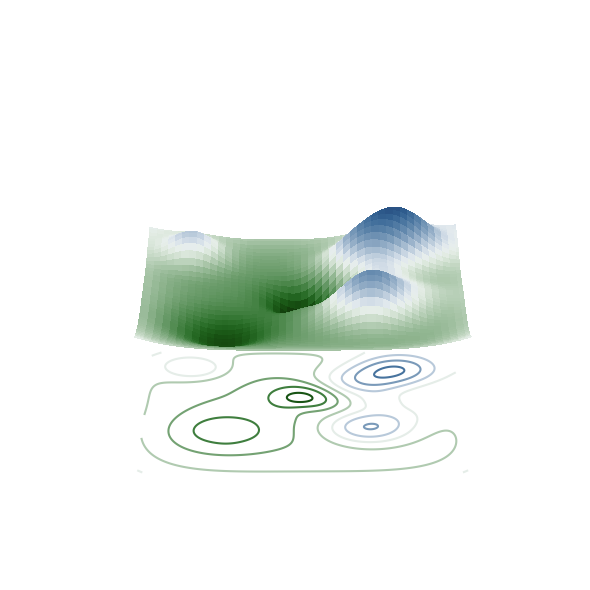

In [278]:
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5,2.),
    's': (0.1, 1.),
}

par_choice_values = {}
%autoreload


used_fp_types = (Node,UnstableNode)
# used_fp_types = (Node,)

n_modules = 10
start_module_list = [random.choice(used_fp_types).generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=None)

In [ ]:
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}
%autoreload


used_fp_types = (Node,UnstableNode, Center, NegCenter)
# used_fp_types = (Node,)

n_modules = 7
start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(3)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]
start_module_list_3 = [Center.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]
start_module_list_4 = [NegCenter.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]

start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)

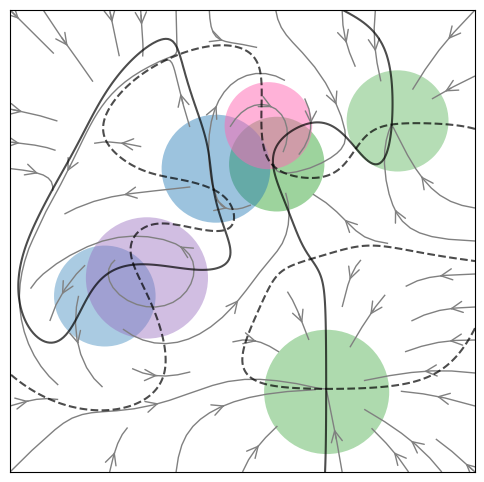

In [322]:
L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

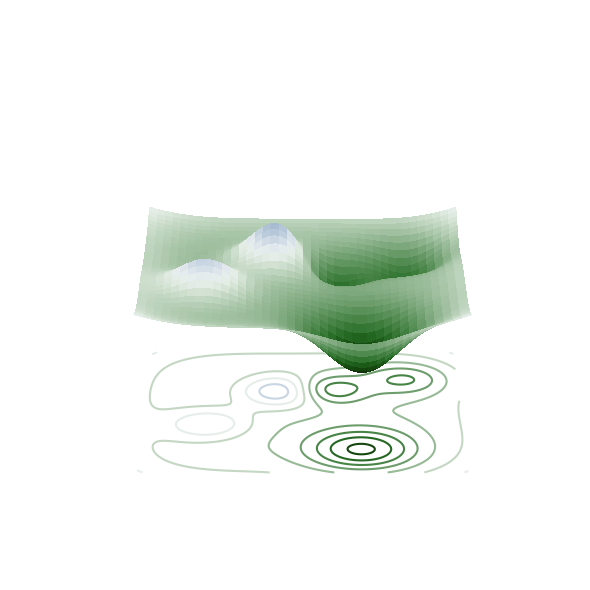

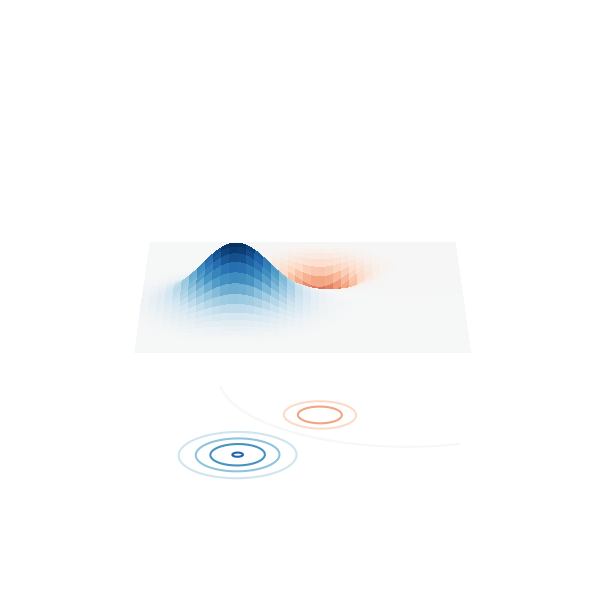

In [323]:

fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=None)
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, rot=True, offset=3)

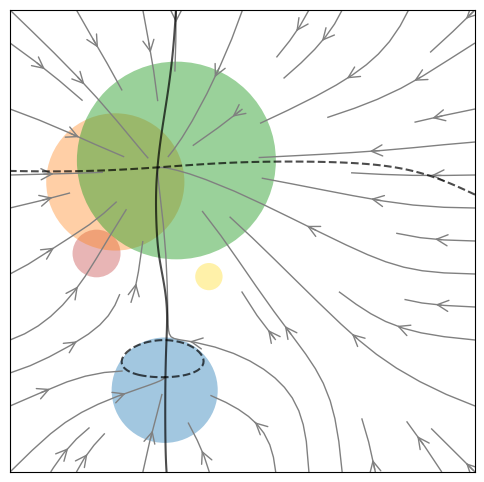

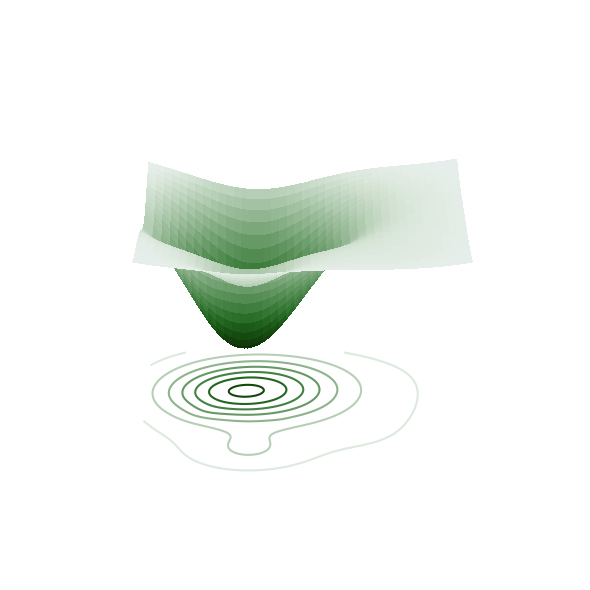

In [45]:
%autoreload
L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='order')

fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='order', cmap_center=0.5)

Landscape with modules:
UnstableNode at (0.0, 0.0), a = [1.5 1.5 1.5], s = [1. 1. 1.]


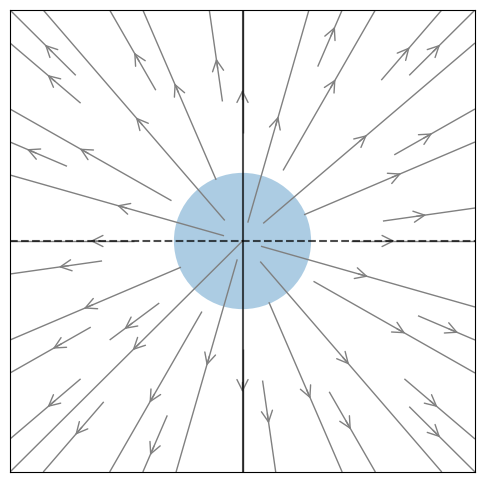

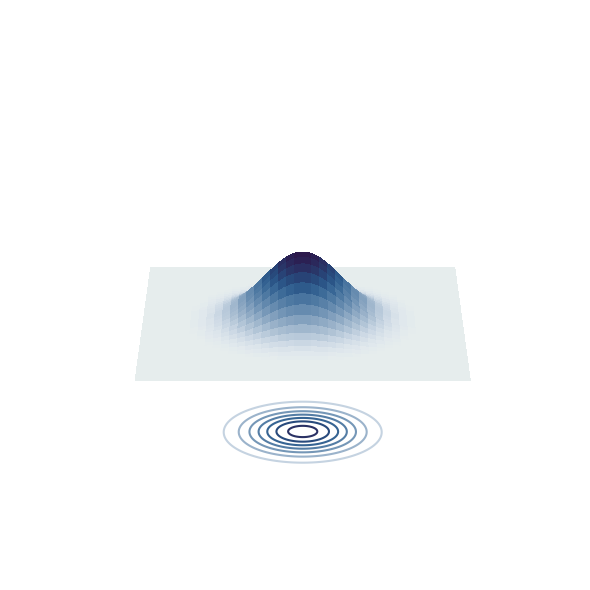

In [13]:
%autoreload

par_limits = {
    # 'x': (-3.,3.),
    # 'y': (-3., 3.),
    # 'a': (0.5,3.),
    # 's': (0.1, 1.5),
}

par_choice_values = {
    'x': (0.,),
    'y': (0.,),
    'a': (1.5,),
    's': (1.,),
}

used_fp_types = (UnstableNode,)

n_modules = 1
start_module_list = [random.choice(used_fp_types).generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(2., 7.), A0=0.0)

print(landscape)

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='order', cmap_center=0., scatter=False, rot=False, offset=2.5)


Landscape with modules:
Node at (-0.0, 1.0), a = [1. 1. 1.], s = [0.8 0.8 0.8],
Node at (-2.1, -1.0), a = [1.6 1.6 1.6], s = [0.9 0.9 0.9],
Node at (2.2, -1.0), a = [1.5 1.5 1.5], s = [1.3 1.3 1.3]


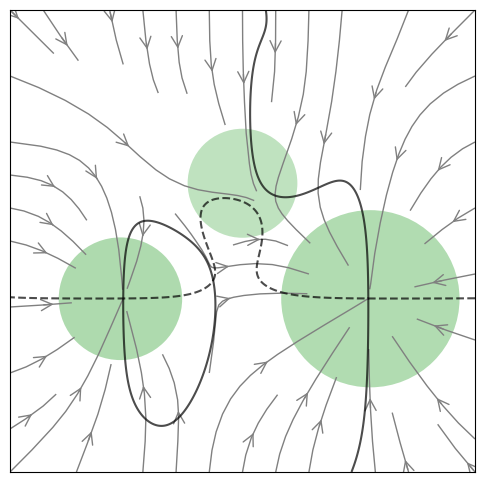

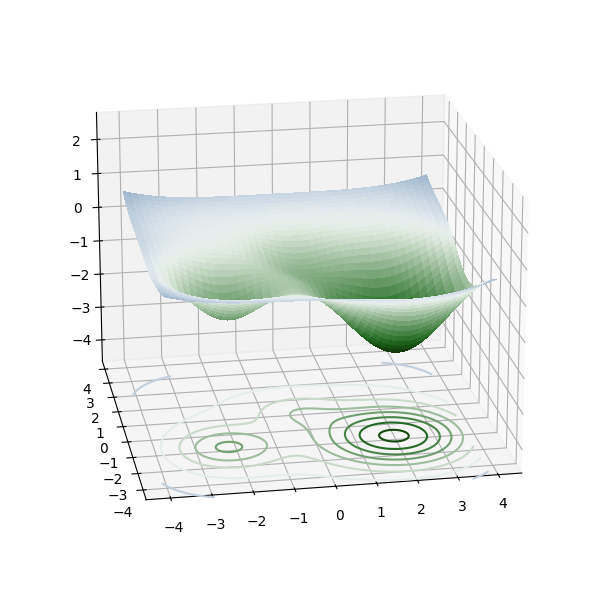

In [345]:
%autoreload

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')


M1 = Node(x=-0., y=1., a=1.*np.ones(3), s=0.8*np.ones(3))
M2 = Node(x=-2.1, y=-1., a=1.6*np.ones(3), s=0.9*np.ones(3))
M3 = Node(x=2.2, y=-1., a=1.5*np.ones(3), s=1.3*np.ones(3))

# flip : y = 2 and -2, x = -1.8, 1.8

start_module_list = [M1,M2,M3]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=None, A0=0.005)

print(landscape)

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='order', cmap_center=0., scatter=False, rot=False, offset=2.5)


Landscape with modules:
Node at (-0.5, 2.9), a = [1.9 1.9 1.9], s = [0.8 0.8 0.8],
Node at (0.0, 1.0), a = [2.3 2.3 2.3], s = [0.7 0.7 0.7],
Node at (-1.3, -1.5), a = [2. 2. 2.], s = [1.1 1.1 1.1],
Node at (2.0, -0.6), a = [2.5 2.5 2.5], s = [0.9 0.9 0.9],
UnstableNode at (2.5, 1.5), a = [0. 0. 0.], s = [0.8 0.8 0.8]


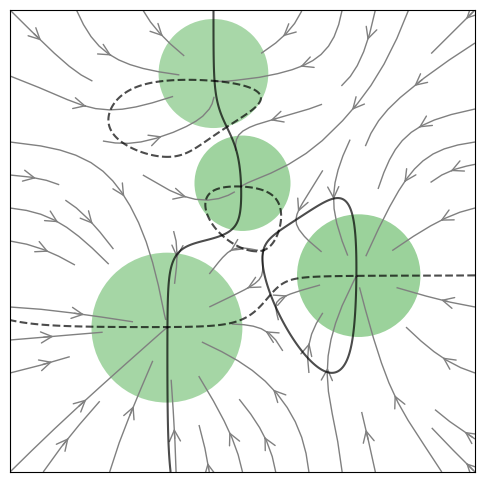

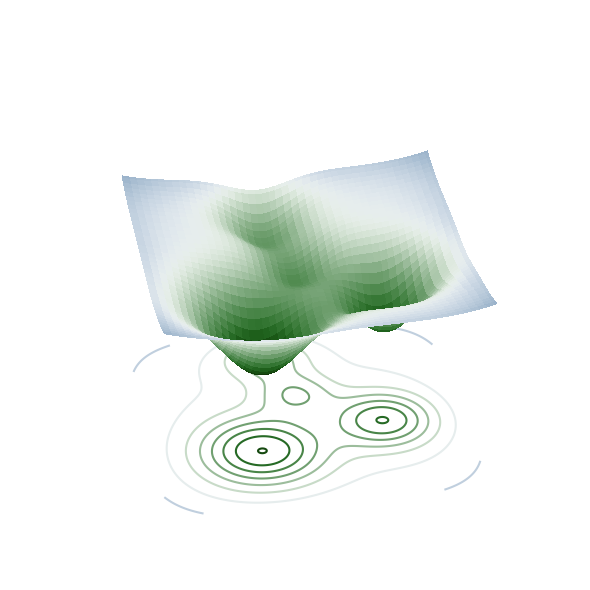

In [231]:
%autoreload

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

M0 = Node(x=-0.5, y =2.9, a = 1.9*np.ones(3), s=0.8*np.ones(3))
M1 = Node(x=0., y=1., a=2.3*np.ones(3), s=0.7*np.ones(3))
M2 = Node(x=-1.3, y=-1.5, a=2*np.ones(3), s=1.1*np.ones(3))
M3 = Node(x=2., y=-0.6, a=2.5*np.ones(3), s=0.9*np.ones(3))
# M4 = UnstableNode(x=2.5, y=1.5, a=0.*np.ones(3), s=.8*np.ones(3))


# flip : y = 2 and -2, x = -1.8, 1.8

start_module_list = [M0,M1,M2,M3,M4]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(100., 200.), A0=0.005)

print(landscape)

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

fig = visualize_potential(landscape, xx, yy, 1, elev=30, azim=-100, color_scheme='order', cmap_center=0, scatter=False, rot=False, offset=2.5)


In [232]:

landscape.n_regimes=3
landscape.init_cells(50, (0.,0.), 3.)
landscape.get_and_plot_traj(0., 10., 51, L, 0.1, frozen=True)

TypeError: '<' not supported between instances of 'NoneType' and 'float'

In [228]:
print(vars(landscape))

{'module_list': [<module_class.Node object at 0x12e96b0d0>, <module_class.Node object at 0x12e96b3d0>, <module_class.Node object at 0x12ee9d710>, <module_class.Node object at 0x12e1bed50>, <module_class.UnstableNode object at 0x12e995190>], 'A0': 0.005, 'mode': None, 'regime': <function piecewise at 0x12cd51940>, 'n_regimes': 3, 'morphogen_times': (100.0, 200.0), 'used_fp_types': (<class 'module_class.Node'>,), 'init_cond': (0.0, 1.0), 'max_n_modules': 15, 'fitness': None, 'result': None, 'cell_coordinates': array([[ 3.49510182e+00,  1.95523281e+00,  1.95538616e+00,
         2.45545918e+00,  2.45183452e+00, -7.59659694e-01,
         5.01446608e+00, -5.99795941e+00, -1.23147529e+00,
        -3.51982017e+00, -5.39186707e+00, -4.06208782e+00,
        -2.05484217e+00, -3.14612510e+00, -1.57357093e+00,
        -1.86065208e+00,  6.94350762e-01,  2.54909316e+00,
        -1.04660392e+00, -1.78194055e+00, -1.02329180e+00,
         1.32323541e+00,  5.41672578e+00,  1.32381212e+00,
        -4.225

In [ ]:
%autoreload


used_fp_types = (Node,UnstableNode)
used_fp_types = (Node,)

n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=(2., 7.), A0=0.0)

print(landscape)

fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-90, color_scheme='order', cmap_center=0.)


Landscape with modules:
UnstableNode at (-0.0, 0.0), a = [2. 2. 2.], s = [1.8 1.8 1.8]


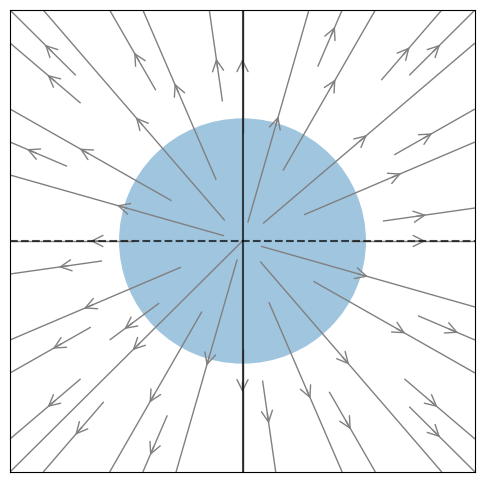

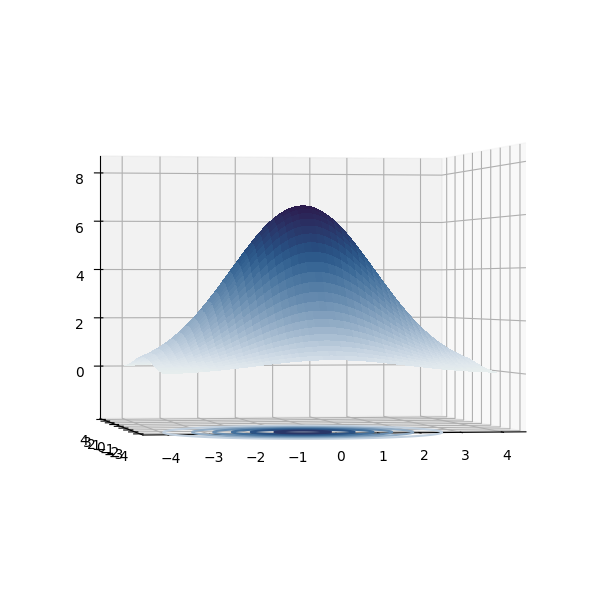

In [349]:
%autoreload

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')


M1 = UnstableNode(x=-0., y=0., a=2.*np.ones(3), s=1.8*np.ones(3))


start_module_list = [M1,]

landscape = Landscape(start_module_list, mode=None, regime=mr.piecewise, morphogen_times=None, A0=0.0)

print(landscape)

fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

fig = visualize_potential(landscape, xx, yy, 1, elev=0, azim=-100, color_scheme='order', cmap_center=0., scatter=False, rot=False, offset=2.5)


# Frames for gif of segmentation landscape


In [243]:
M1 = Node(x=-1.5546770206538318, y=-1.6355540804849715, a = [0.2227, 1.8863], s = [0.8021, 1.1112], tau = 0.21)
M2 = Node(x=1.5193310233235011, y=1.5199678692108587, a = [0.8811, 2.2256], s = [0.4923, 0.86], tau = 0.0947)
M3 = NegCenter(x=-0.011546229550786435, y=0.6514305642664748, a = [2.4758, 0.1994], s = [1.445, 0.467], tau = 0.3441)
M4 = NegCenter(x=-0.15884746768104208, y=-0.6625725096540123, a = [1.65, 2.8492], s = [0.8949, 0.2594], tau = 1.4895)

Node at (-1.5546770206538318, -1.6355540804849715), a = [0.2227 1.8863], s = [0.8021 1.1112], tau = 0.21,
Node at (1.5193310233235011, 1.5199678692108587), a = [0.8811 2.2256], s = [0.4923 0.86  ], tau = 0.0947,
NegCenter at (-0.011546229550786435, 0.6514305642664748), a = [2.4758 0.1994], s = [1.445 0.467], tau = 0.3441,
NegCenter at (-0.15884746768104208, -0.6625725096540123), a = [1.65   2.8492], s = [0.8949 0.2594], tau = 1.4895

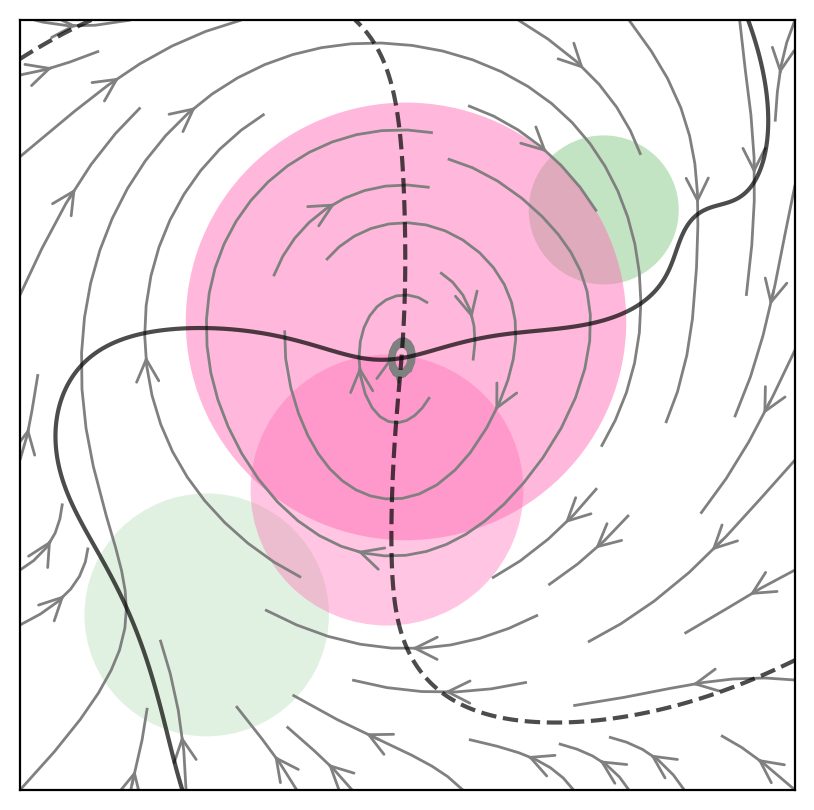

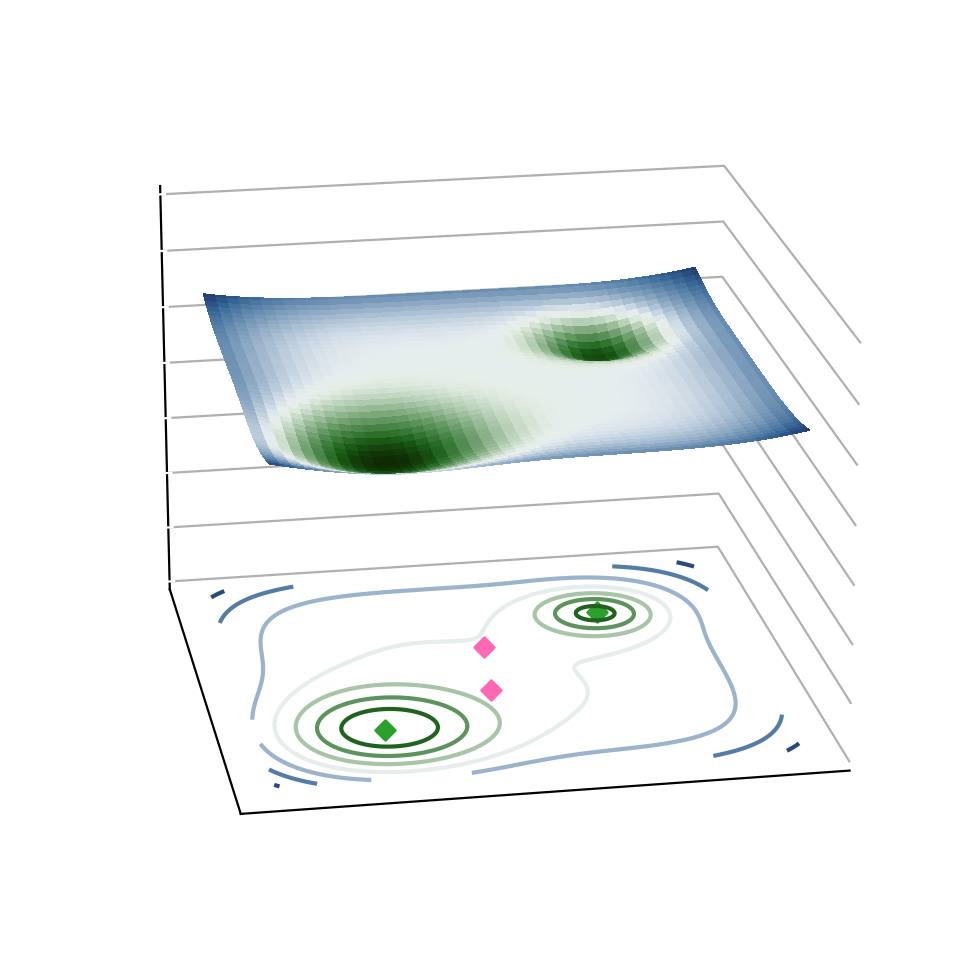

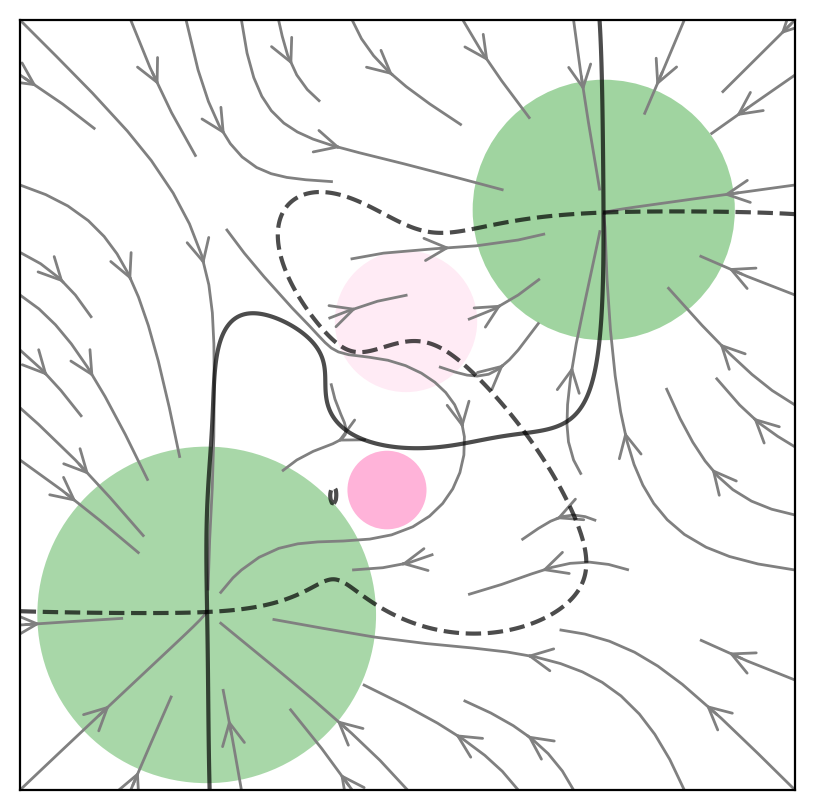

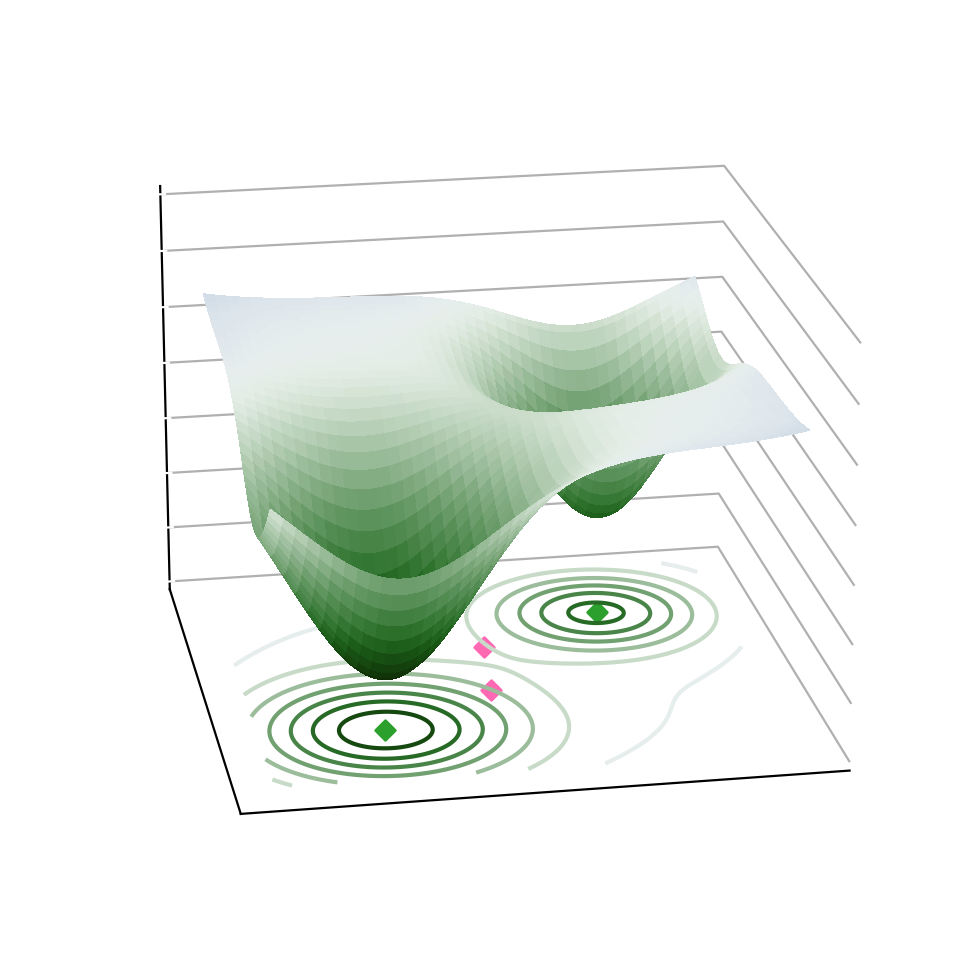

In [244]:
%autoreload
module_list = [M1, M2, M3, M4]

landscape = Landscape(module_list, mode=None, regime=mr.sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-2.5,1)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 1, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)


In [175]:


# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

(2, 6, 25)


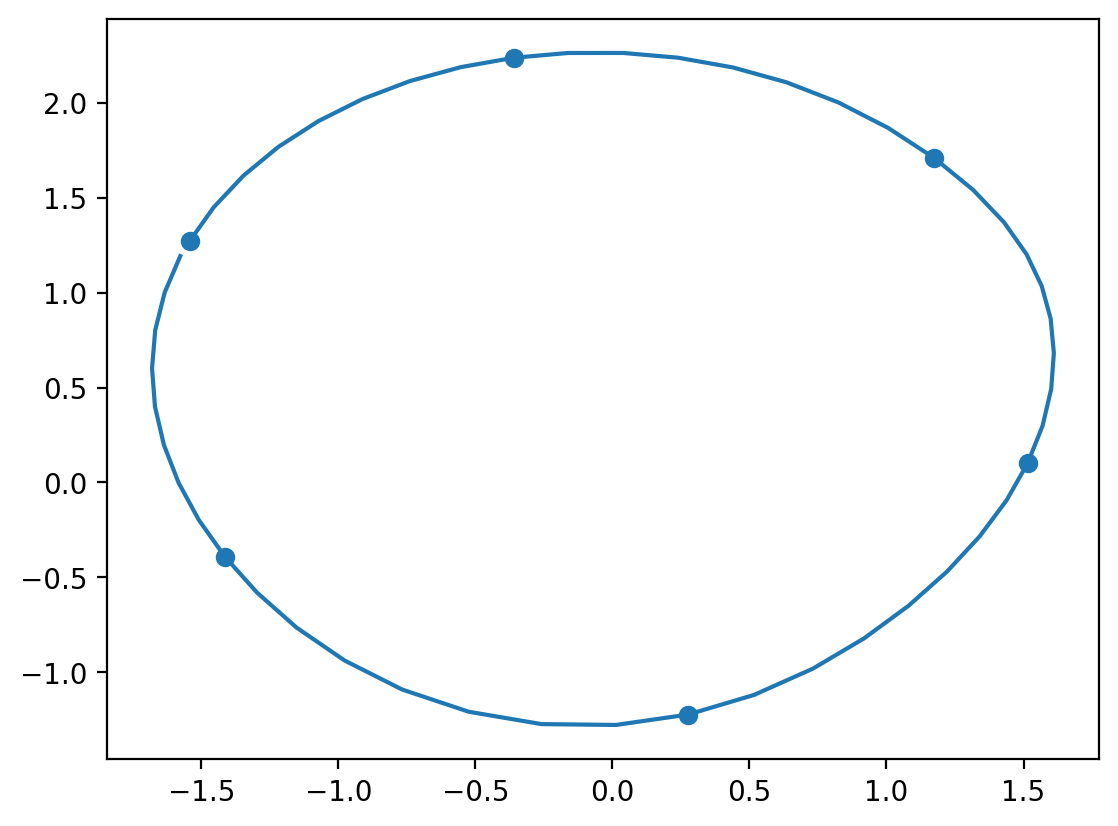

In [190]:
landscape.init_cells(1, init_cond=(-1.5,0))
cycle_traj, states = landscape.run_cells(0, 31, 301, ndt=100, frozen=True, t_freeze=-1)
cycle_start = 200
cycle_end = 250
plt.plot(cycle_traj[0, 0, cycle_start:cycle_end], cycle_traj[1, 0, cycle_start:cycle_end])
points = np.linspace(200, 250, n_cells+1)[:-1].astype('int')
cell_init_cond = np.array((cycle_traj[0, 0, points], cycle_traj[1, 0, points]))
plt.scatter(cell_init_cond[0, :], cell_init_cond[1, :])
plt.show()

In [211]:
time_pars = (-3., 4., 701)
times = np.linspace(*time_pars)
n_cells = 6 
# angles = np.linspace(0., 2*np.pi, n_cells+1)[:-1]
# r = 1.5
# cell_init_cond = np.array([r*np.cos(angles), r*np.sin(angles)])
landscape.init_cells(n_cells, init_cond=cell_init_cond)
traj, states = landscape.run_cells(*time_pars, ndt=100)
print(traj.shape)
for it, t in enumerate(times):
    fig, ax = visualize_landscape_t(landscape, xx, yy, t, color_scheme='fp_types', traj_times=(0, 41, 401), traj_init_cond=(-1.2,0), traj_start=200)
    ax.scatter(traj[0,:,it], traj[1,:,it], marker='o', s=30, zorder=10, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', ]) #'#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    fig.savefig('figures/homoclinic_movie_2/'+str(it))
    plt.close(fig)  
    
print('Frames saved')
    
# fig.show()
# fig = visualize_landscape_t(landscape, xx, yy, -0.4, color_scheme='fp_types', traj_times=(0, 40, 401), traj_init_cond=(-1,2), traj_start=200)
# fig = visualize_landscape_t(landscape, xx, yy, -0.3, color_scheme='fp_types', traj_times=(0, 40, 401), traj_init_cond=(-1,1), traj_start=200)
# fig = visualize_landscape_t(landscape, xx, yy, -0.2, color_scheme='fp_types', traj_times=(0, 40, 401), traj_init_cond=(-1,1), traj_start=200)


(2, 6, 701)
Frames saved


In [201]:
from PIL import Image, ImageDraw


In [215]:
images = []
for i in range(150,501):
    images.append(Image.open('figures/homoclinic_movie_2/'+str(i)+'.png'))
images[0].save('figures/homoclinic_1_5.gif', save_all=True, append_images=images[1:], duration=100, loop=0)


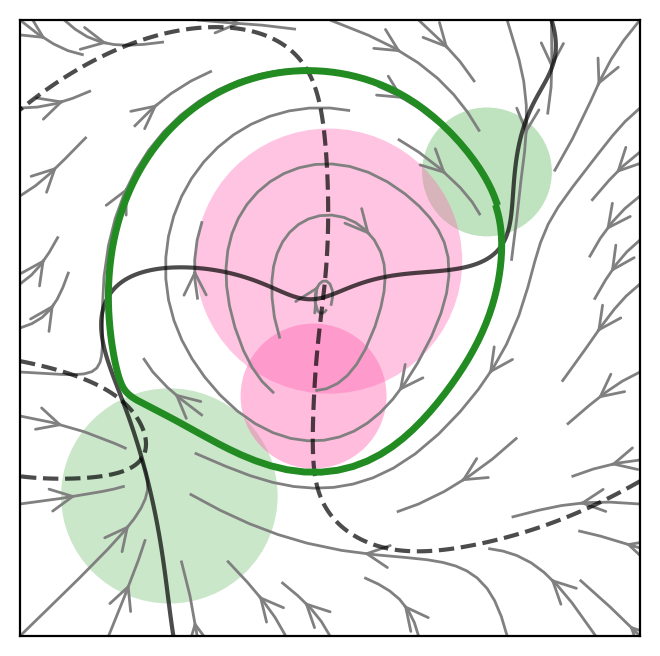

In [245]:
fig, ax = visualize_landscape_t(landscape, xx, yy, -0.2, color_scheme='fp_types', traj_times=(0, 41, 401), traj_init_cond=(-1.2,0), traj_start=180)


## SNIC landscape

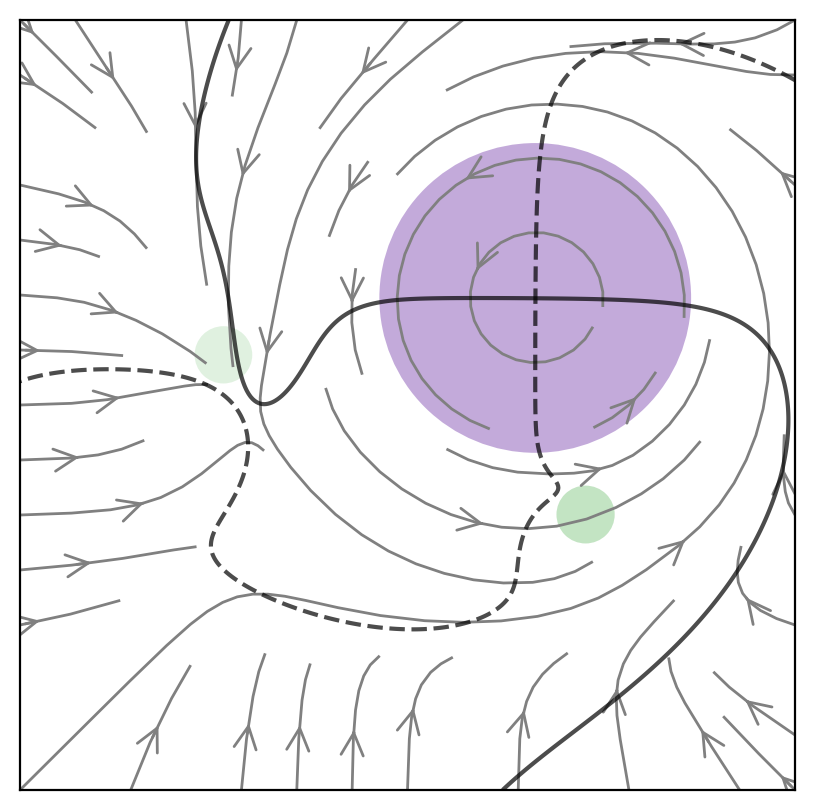

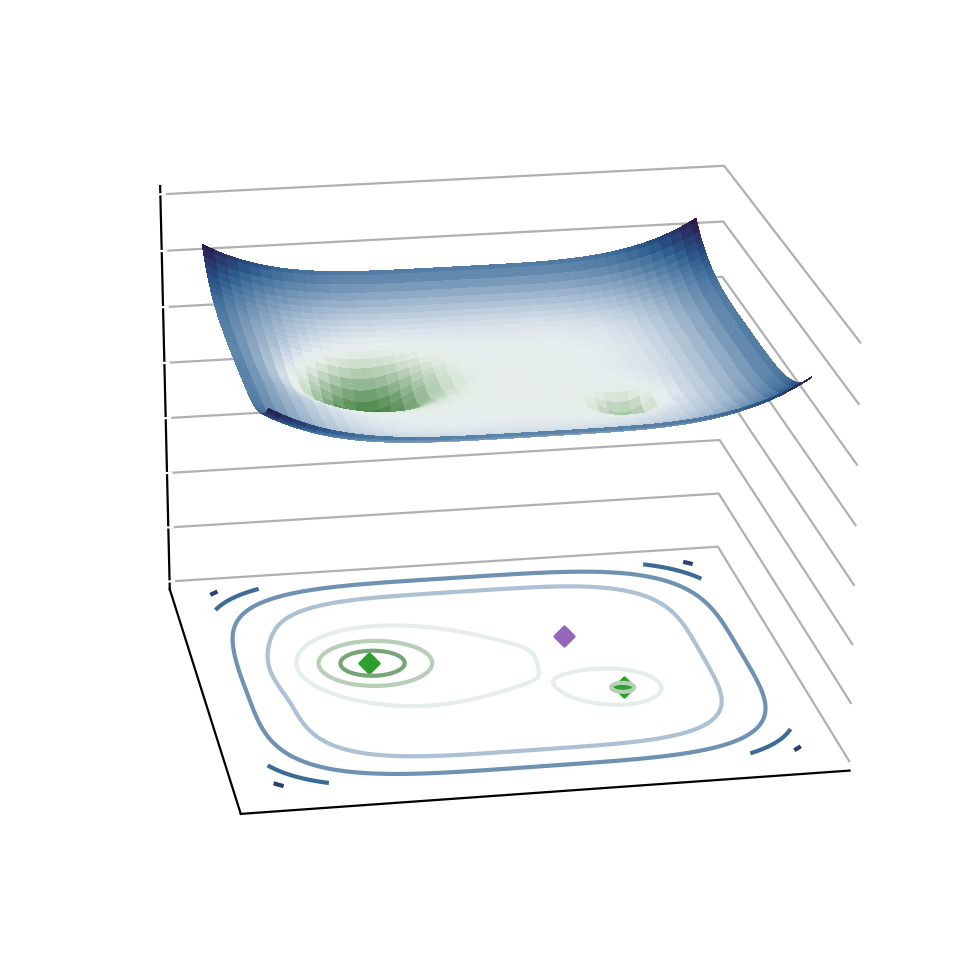

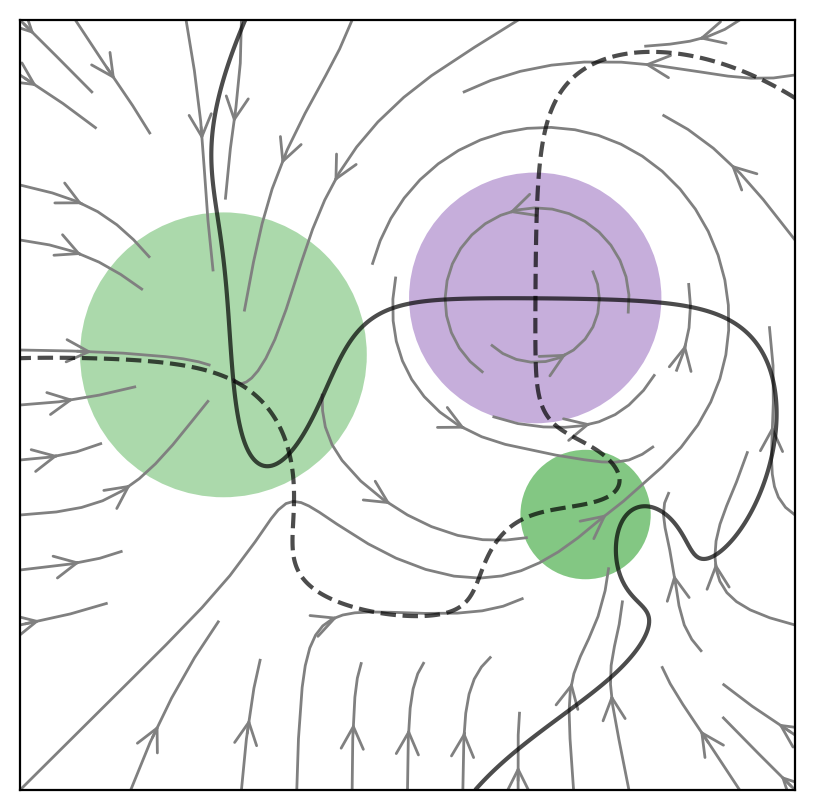

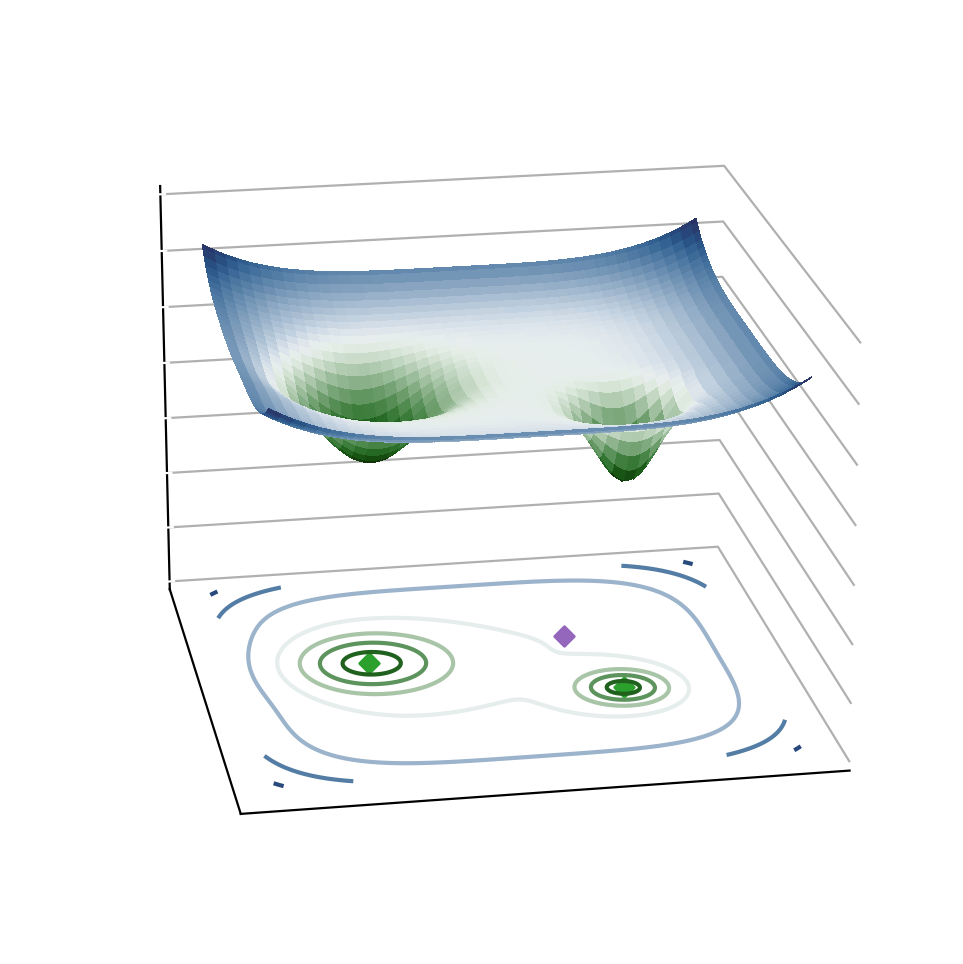

In [226]:
M1 = Node(1.8382491303500434, -1.1381125475805725, a = [0.8862, 3.798 ], s = [0.2547, 0.5699], tau = 0.4982)
M2 = Node(-1.9000711817562257, 0.5212171669237642, a = [0.2379, 1.7334], s = [0.2522, 1.2541], tau = 1.9099)
M3 = Center(1.3186398446050207, 1.1123626132714173, a = [3.4343, 3.1594], s = [1.3636, 1.1037], tau = 0.9818)

module_list = [M1, M2, M3]

landscape = Landscape(module_list, mode=None, regime=mr.sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-2.5,1)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 1, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)

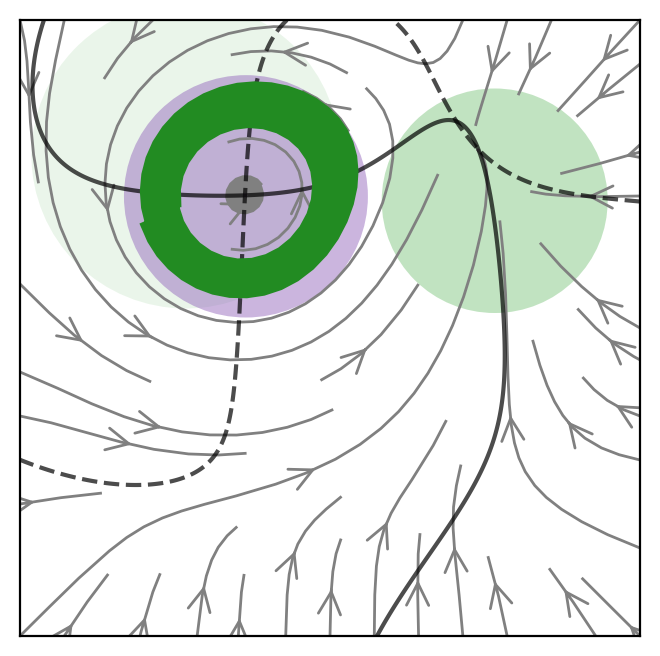

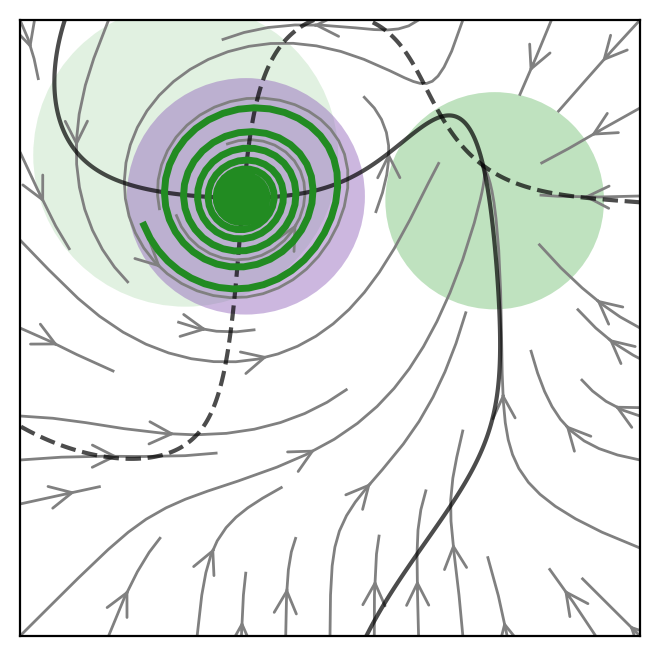

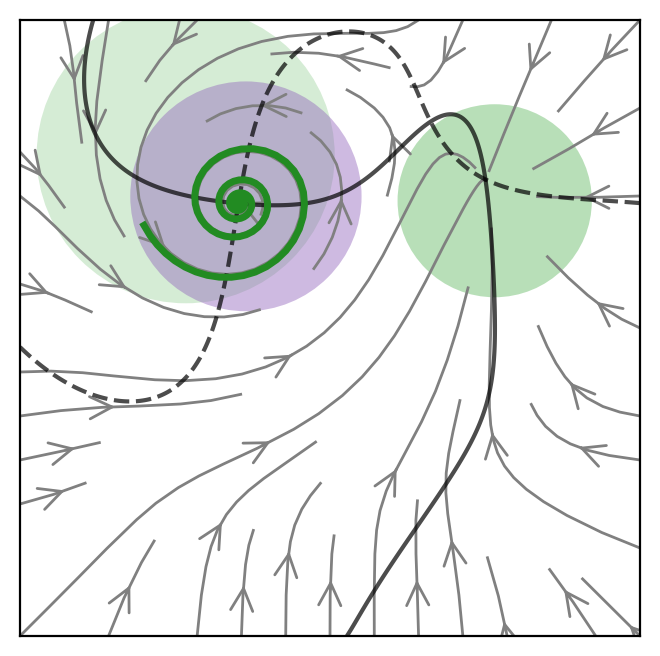

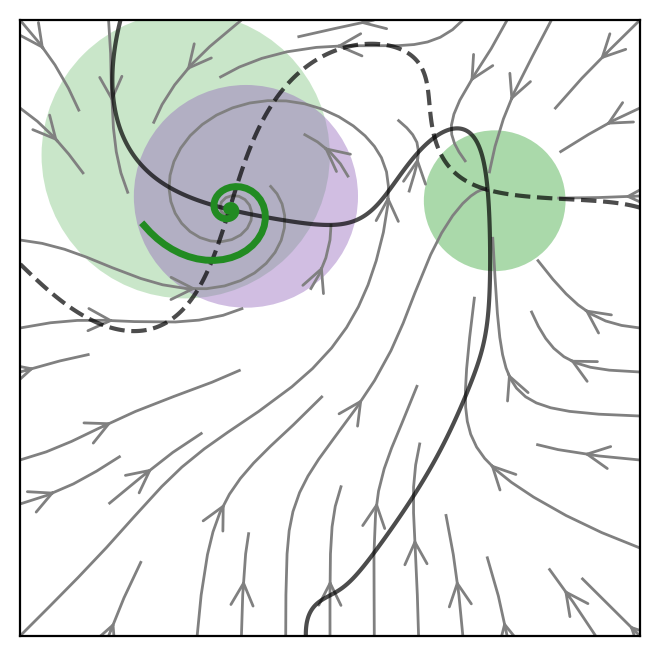

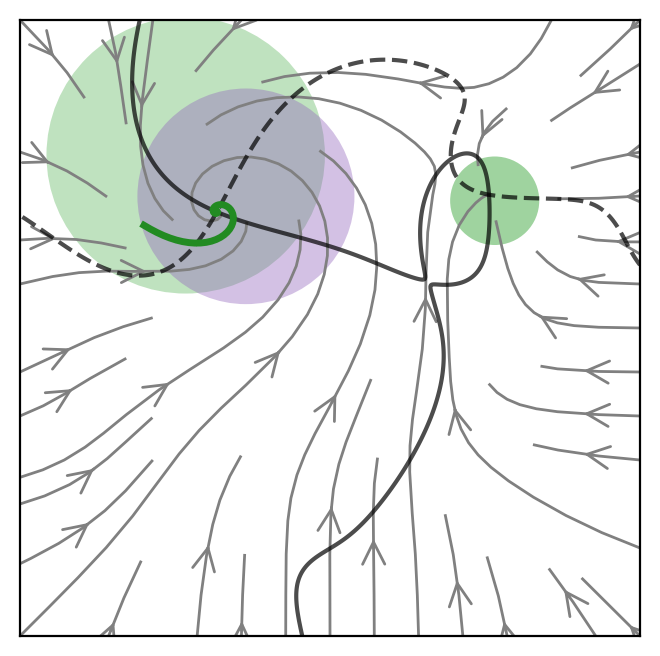

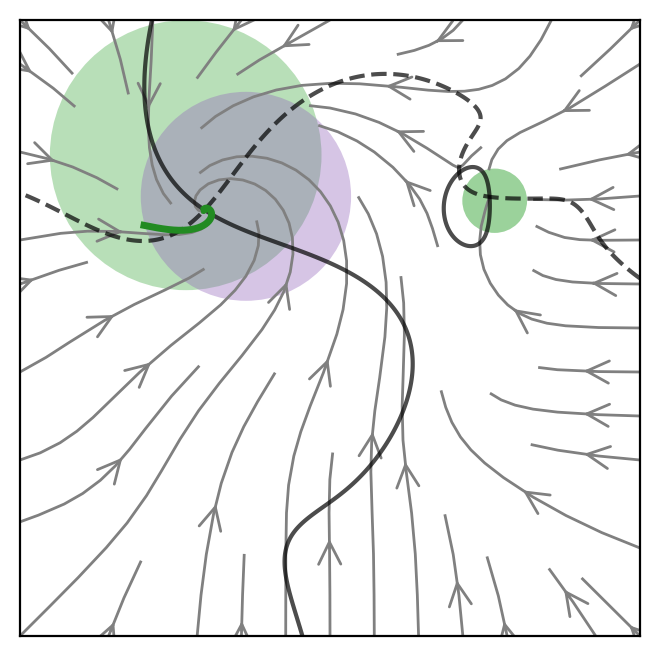

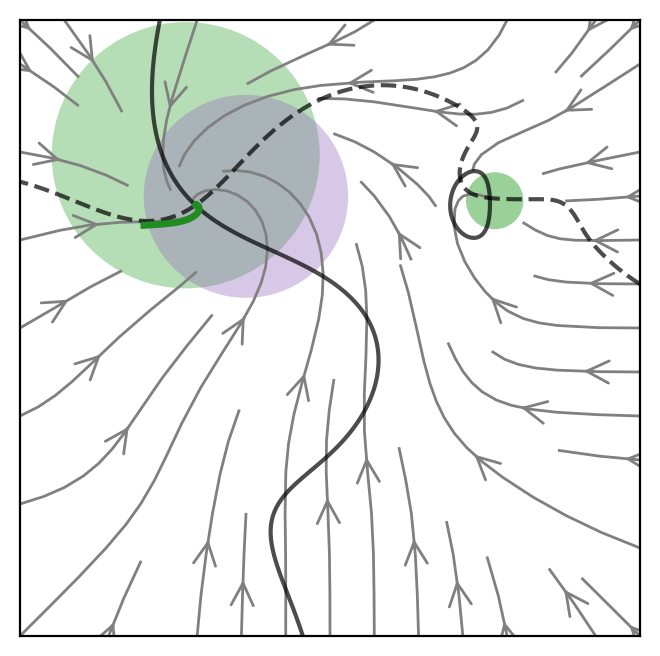

In [240]:
time_pars = (-2, 2., 7)
times = np.linspace(*time_pars)
n_cells = 6 
# angles = np.linspace(0., 2*np.pi, n_cells+1)[:-1]
# r = 1.5
# cell_init_cond = np.array([r*np.cos(angles), r*np.sin(angles)])

# landscape.init_cells(n_cells, init_cond=cell_init_cond)
# traj, states = landscape.run_cells(*time_pars, ndt=100)
# print(traj.shape)
for it, t in enumerate(times):
    fig, ax = visualize_landscape_t(landscape, xx, yy, t, color_scheme='fp_types', traj_times=(0, 41, 401), traj_init_cond=(-1.8,1.), traj_start=0)
    # ax.scatter(traj[0,:,it], traj[1,:,it], marker='o', s=30, zorder=10, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', ]) #'#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    # fig.savefig('figures/homoclinic_movie_2/'+str(it))
    # plt.close(fig)  
    

## Hopf landscape

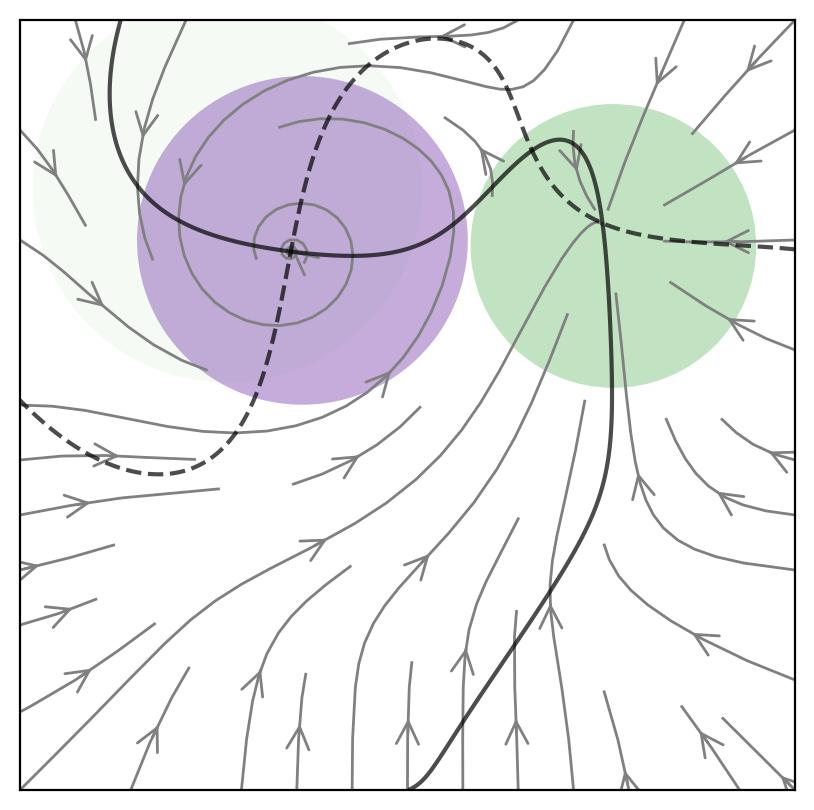

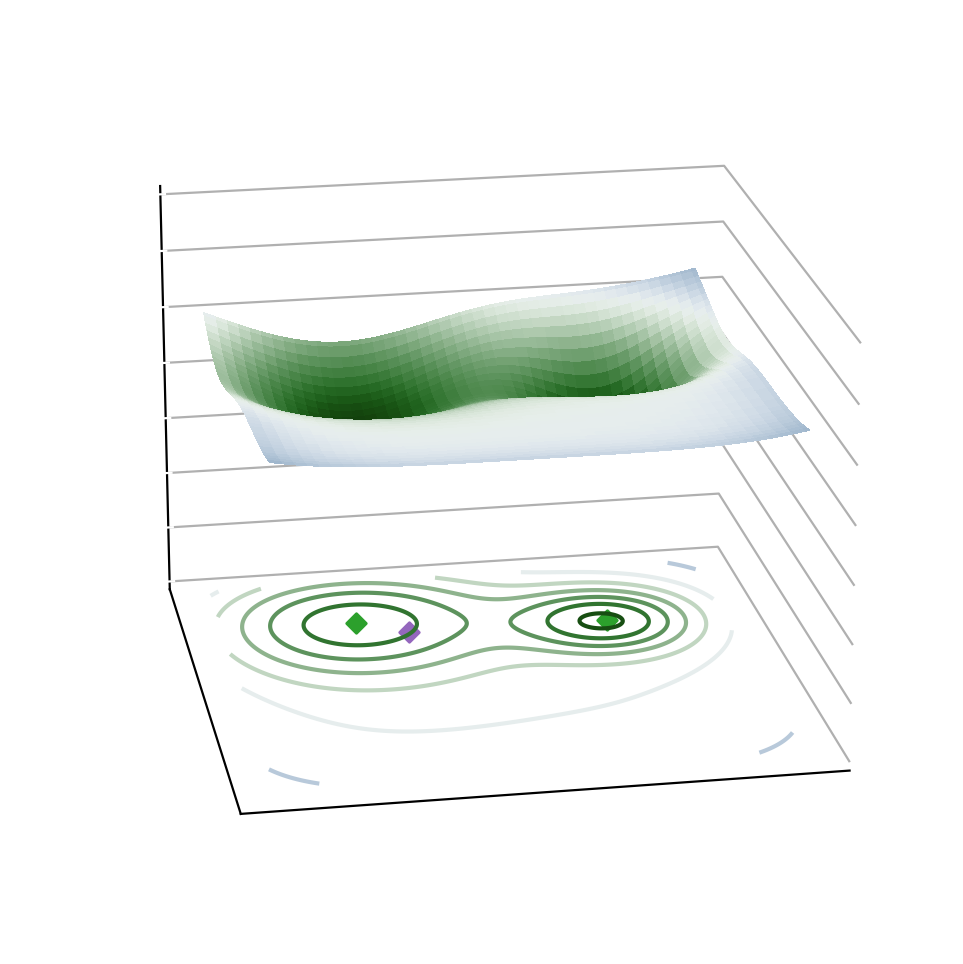

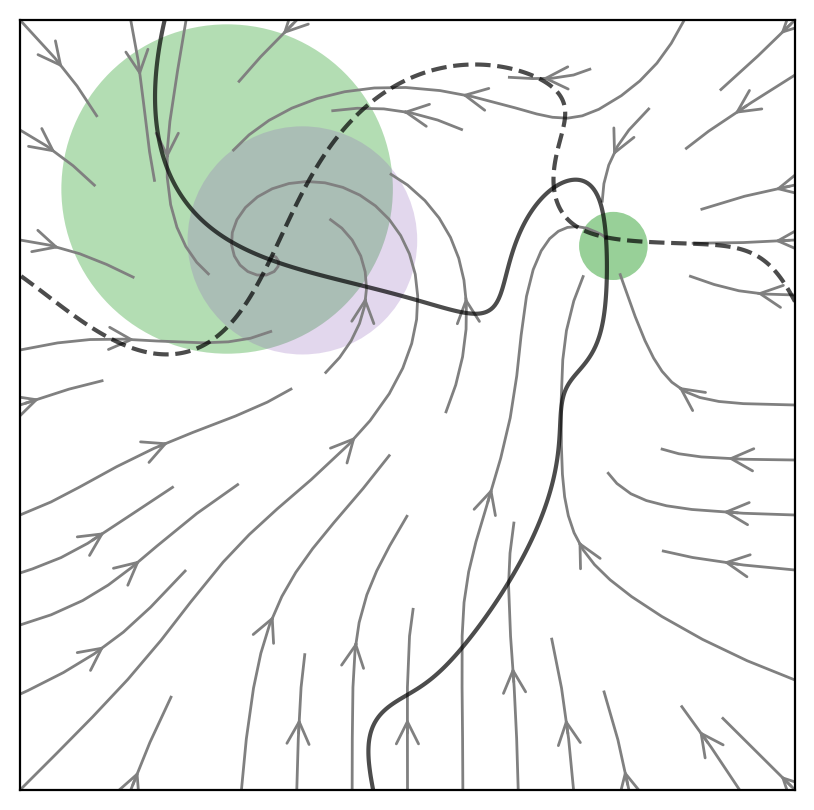

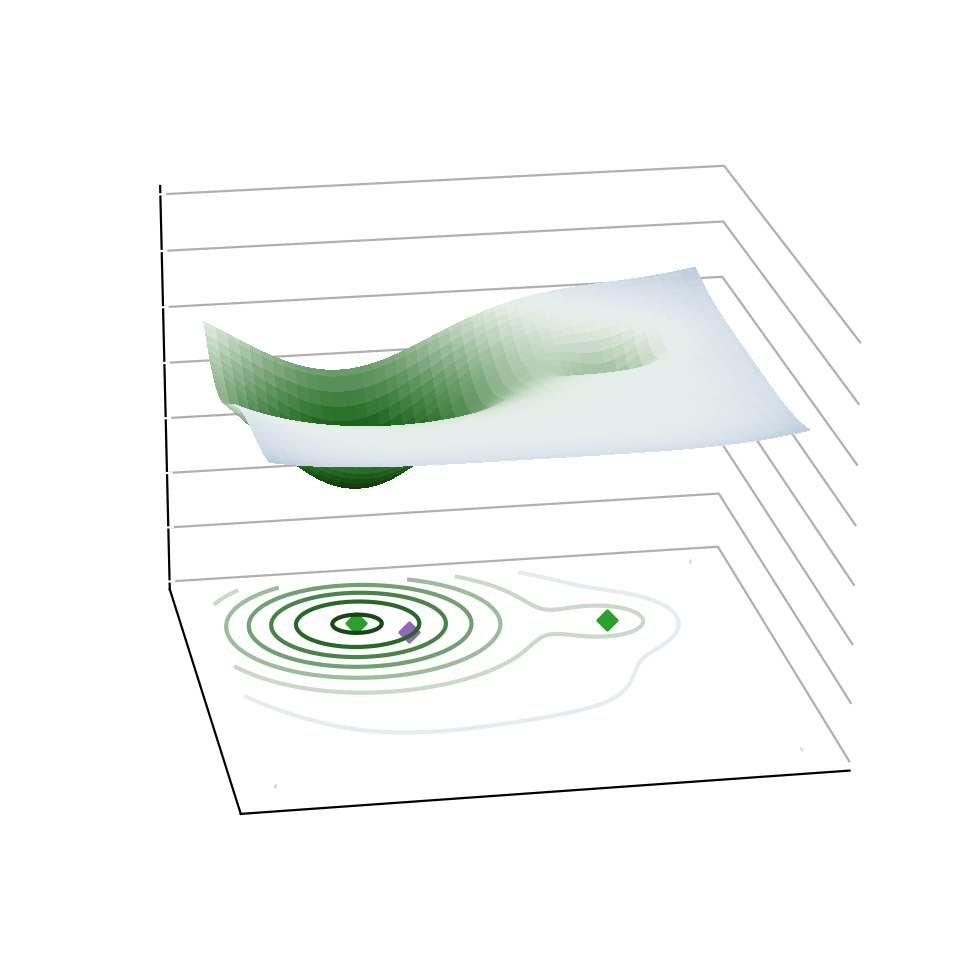

In [232]:
M1 = Node(-1.396520984146739, 1.6829665061300272, a = [0.021,  1.4176], s = [1.2766, 1.0875], tau = 0.7336)
M2 = Node(1.5938144419754061, 1.2394544731911954, a = [0.9109, 2.6167], s = [0.937, 0.225], tau = 0.4747)
M3 = Center(-0.8136619835740215, 1.2825727653806398, a = [3.274, 0.7666], s = [1.0851, 0.7533], tau = 1.8714)


module_list = [M1, M2, M3]

L = 3.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

landscape = Landscape(module_list, mode=None, regime=mr.sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-2.5,1)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 1, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim)

# Differentiation solution 2  (04.17 0)


In [3]:
# M1 = Node(-1.6040221802874024, -1.4379550904418155, a = [2.4045, 0.661, 0.8052], s = [0.6079, 0.2653, 0.4859])
# M2 = Node(0.5559456237772475, -1.139971534924702, a = [2.3297, 0.3736, 3.0648], s = [0.7246, 1.471, 0.3941])
# M3 = Node(0.11369091675107845, 0.6911586213136693, a = [1.5779, 0.6753, 2.6919], s = [0.1547, 1.097,  1.4643])
# M4 = Node(2.7268067579912376, -3.6300266350135093, a = [1.6561, 3.6262, 3.7681], s = [0.9088, 1.3972, 1.3276])
# M5 = Node(-1.949024824877971, 1.681711562420901, a = [2.1652, 2.6117, 3.4048], s = [1.3491, 0.9765, 1.0717])

M1 = Node(-1.6427475651628276, -0.36672817589444895, a = [0.3038, 0.7182, 2.3907], s = [2.3139, 0.4677, 1.0041])
M2 = Node(-0.10417886662412723, 1.0589989998217275, a = [0.205, 0.4664, 1.5271], s = [0.2736, 2.306, 0.1535])
M3 = Node(-0.6290928188954503, 1.616364051906499, a = [0.267, 1.9844, 2.7345], s = [2.429, 0.2667, 0.7457])
M4 = Node(2.2208912469176534, -2.565776261244266, a = [1.4276, 0.5861, 3.6771], s = [1.1672, 1.5997, 1.9875])
M5 = Node(-2.8570029920370716, 2.3859479288578695, a = [2.6423, 2.1639, 3.7864], s = [0.2998, 1.077, 1.112 ])

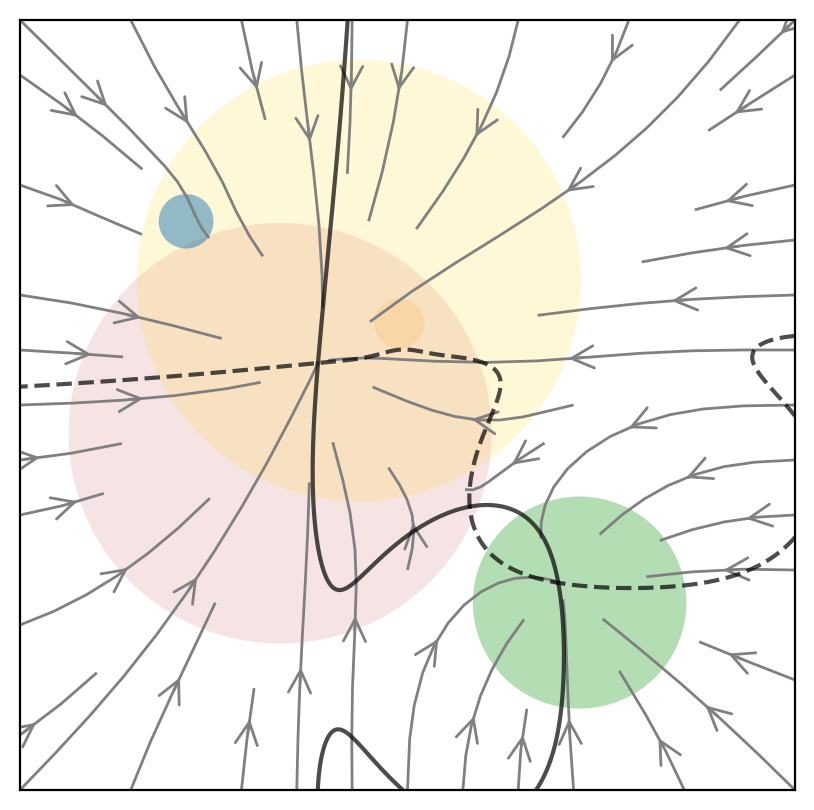

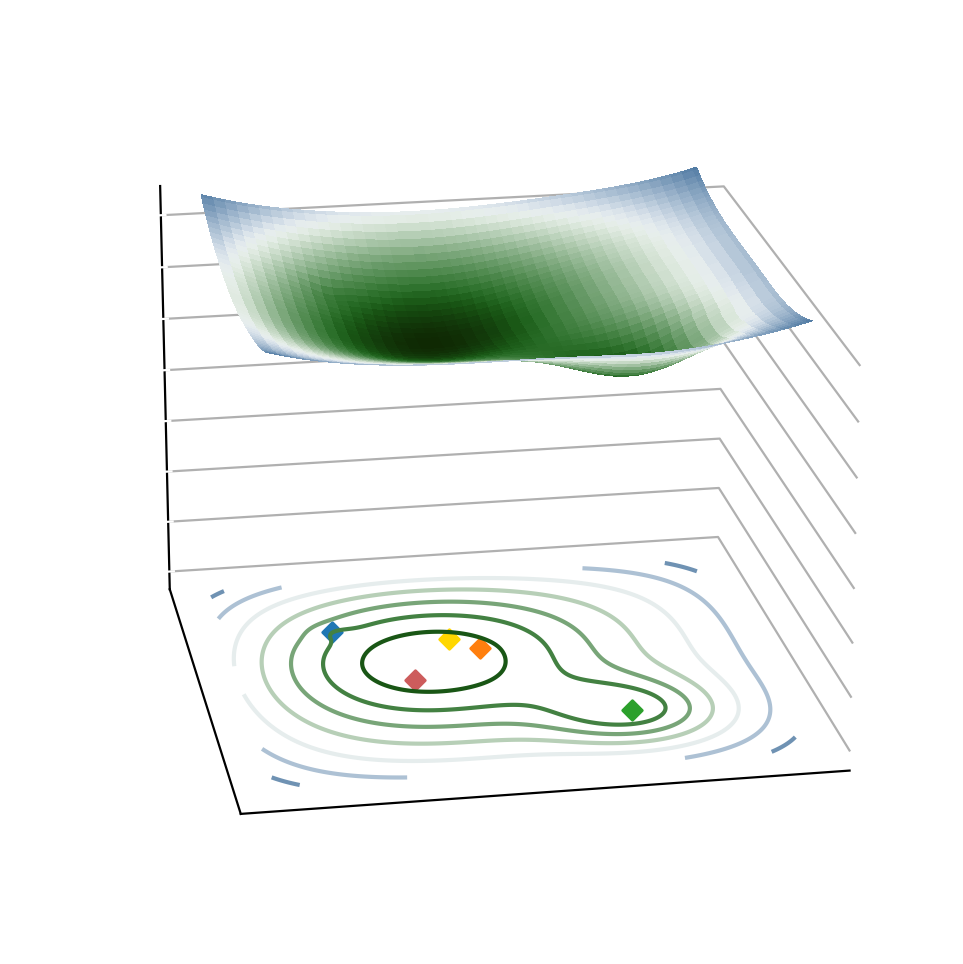

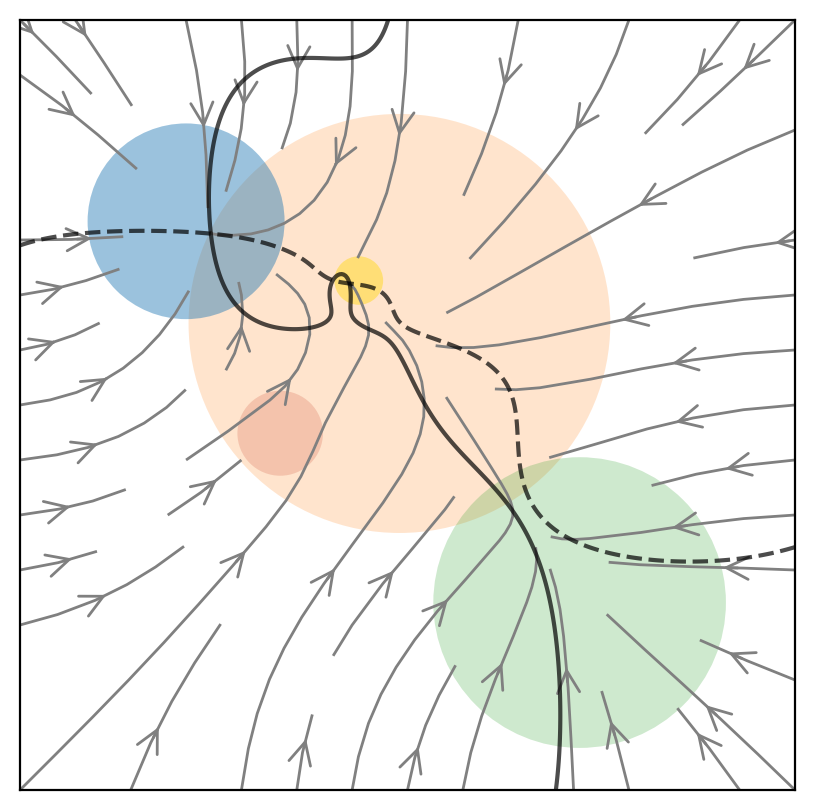

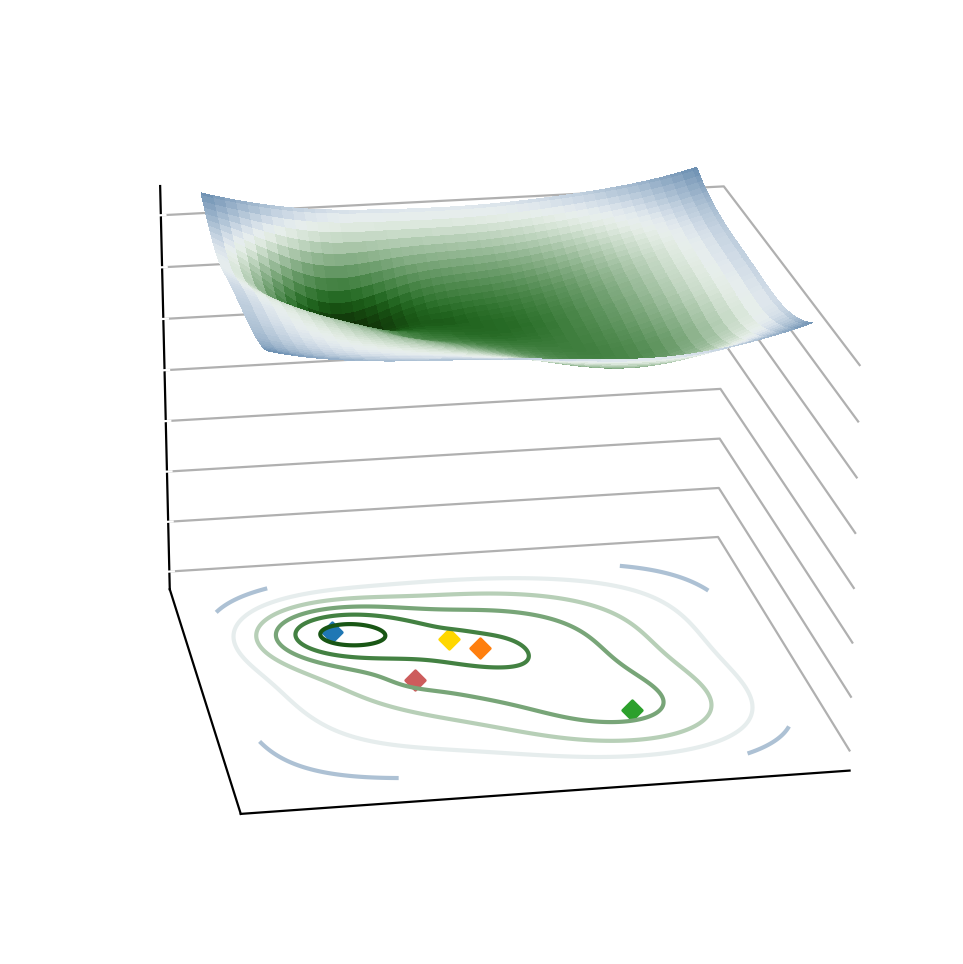

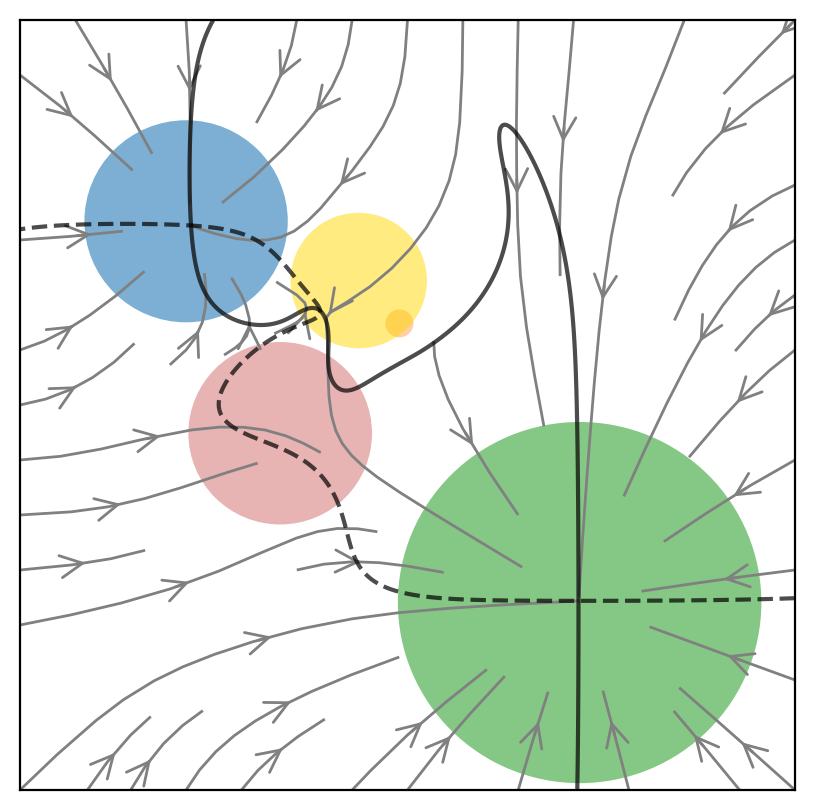

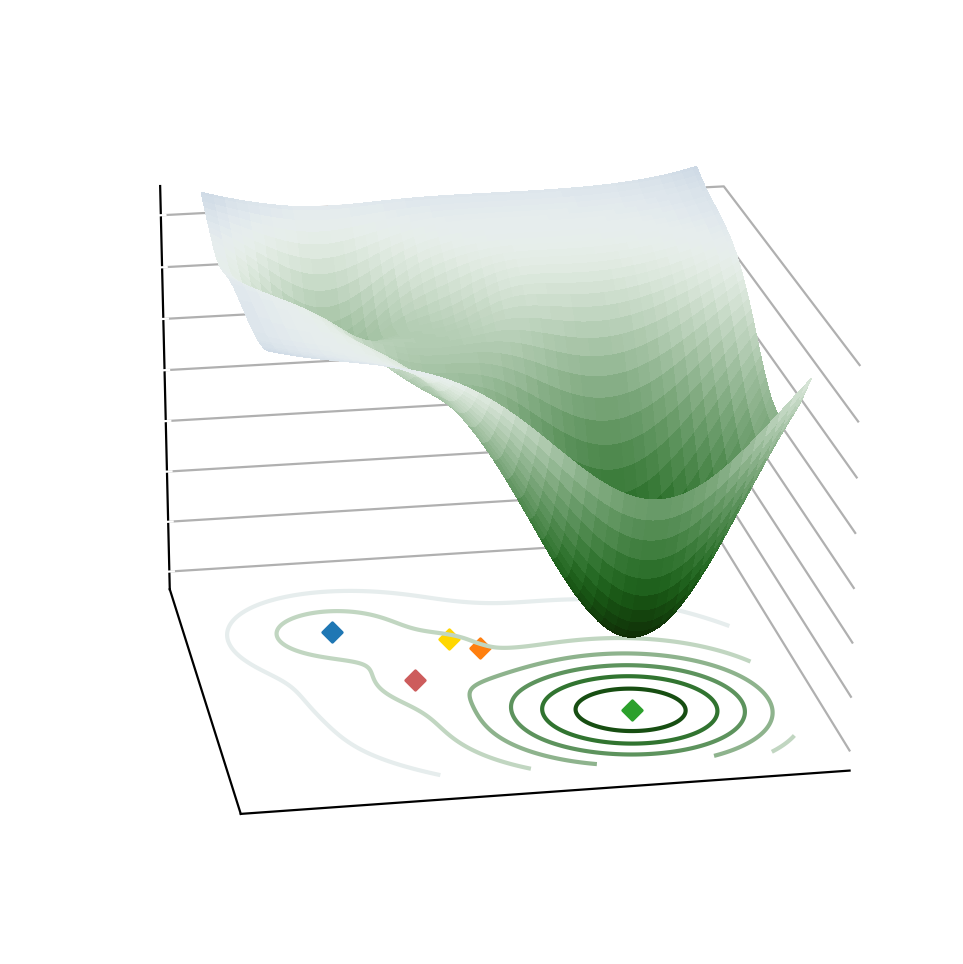

In [7]:
L = 5.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

module_list = [M1, M2, M3, M4, M5]
landscape = Landscape(module_list, mode=None, regime=mr.piecewise, morphogen_times=(1., 2.), A0=0.005)

zlim=(-18.,1)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 1, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 1, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
fig = visualize_landscape(landscape, xx, yy, 2, color_scheme='order')
fig = visualize_potential(landscape, xx, yy, 2, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)

In [8]:
import pickle

In [25]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

In [45]:
zlim=(-2.,1)

dir = 'figures/evolution_1/'

for gen in range(0, 300, 10):
    filename = 'saved_files/CellDiff_Dataset_Landscape/20240417-214209/20240417-214209_module_list_'+str(gen)+'.pickle'
    with open(filename, "rb") as file:
        module_list = pickle.load(file)
    # print(module_list)
    
    landscape = Landscape(module_list, mode=None, regime=mr.piecewise, morphogen_times=(1., 2.), A0=0.005)
    
    fig = visualize_potential(landscape, xx, yy, 2, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
    ax = plt.gca()
    # title = title
    ax.set_title('Generation '+str(gen), fontsize=15)
    # plt.tight_layout()
    fig.savefig(dir+'gen'+str(gen))
    plt.close(fig)  

In [53]:
zlim=(-8.,1)
L = 5.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

dir = 'figures/evolution_2/'

for gen in range(0, 300, 10):
    filename = 'saved_files/CellDiff_Dataset_Landscape/20240417-205740/20240417-205740_module_list_'+str(gen)+'.pickle'
    with open(filename, "rb") as file:
        module_list = pickle.load(file)
    # print(module_list)
    
    landscape = Landscape(module_list, mode=None, regime=mr.piecewise, morphogen_times=(1., 2.), A0=0.005)
    
    fig = visualize_potential(landscape, xx, yy, 2, elev=20, azim=-100, color_scheme='order', scatter=True, cmap_center=0, zlim=zlim)
    ax = plt.gca()
    # title = title
    ax.set_title('Generation '+str(gen), fontsize=15)
    # plt.tight_layout()
    fig.savefig(dir+'gen'+str(gen))
    plt.close(fig)  

In [40]:
from PIL import Image

In [54]:
images = []
for gen in range(0, 260, 10):
    images.append(Image.open(dir+'gen'+str(gen)+'.png'))
images[0].save('figures/evolution_2.gif', save_all=True, append_images=images[1:], duration=500, loop=0)
